## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


![example](images/King_County_Map.jpeg )

# Obtain and Process Data

**Authors:** Dylan Dey
***

## Overview

The following notebook covers the data obtainment, data scrubbing, and data exploration steps of the OSEMN data science process for modeling King County housing prices using multiple linear regression.

A lot of this notebook covers the obtainment of geospatial data using free, open source QGIS software and open source GIS CSV and shapefiles downloaded from KingCounty.org. This data was combined with data from other sources on the open web in order to create a cohesive set of geodata for King County, WA. 

I have created a blog detailing some of this process here:[Linear Regression Model of King County Housing: Obtaining Geographical Data with Open GIS Software](https://dev.to/ddey117/roughdraft-housing-prices-1o97).

My blog is inspired is an adaptation of this blog by author Juico Bowley: [beginner_QGIS](https://towardsdatascience.com/a-beginners-guide-to-feature-engineering-with-qgis-6147ffaba2eb).

Thank you for the inspiration to explore my old interest of mapping once again in a new field!! 

### OSEMN Process

1) Obtain: I have been given a large set of King County housing information, likely downloaded from this Kaggle link:
[King County Housing: Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction). However, a large portion of this project was spent collecting and processing data to be added to this initial kaggle dataset. 

2) Scrub: Multiple Linear Regression Models require data to meet certain statistical and numerical requirements in order to achieve any substantial results. Therefore, a heavy amount of processing was required for this project, covered in this notebook.

3) Explore: The distrubtion of the data is crucial for linear regression models to function optimally. This is the last section of the OSEMN process that will be covered in this section.

4) Model: Build and refine the models of interest. This is covered in a seperate notebook to speed up run time.

5) Interpret: Finally, it is important to actually make sense of the findings given by the newly created models. This will be covered in the same notebook in which the models are built.

## Business Problem

The Seattle Area is a highly sought out area for young adults in technical fields  as well as for new families seeking an ideal place to live and raise their children. 
    
My intention is to build a model that can predict housing prices using a handful of variables that would be interesting to new families or individuals moving into King County, WA. I have engineered some features I am certain people would be interested in when considering moving into the area for the first time.
    
I also intend to create an interpretive model to be able to fully understand the individual contribution of my predictors. Some examples of what I intend to find the full effect of: Per Capita Income, Household Income, School District Rankings, and proximity to museums, parks, and large bodies of natural water. In this way, a family can hand select features as if they were selecting packages on a new or used vehicle, as well as get an understanding of what kind of properties people in the area are buying according to their incomes. Being able to visualize price tags on geological predictors such as these can prove useful to consumers in the housing market. 
    
Finally, I have attempted to include similar models with rent as the target instead of housing prices. Home ownership has become a less obtainable prospect for a large number of families and individuals. Therefore, it would make a lot of sense to create models to predict and interpret the cost of renting properties in the area as well.


In [1]:
#import all necessary libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.linear_model import LinearRegression
# import sklearn.metrics as metrics
# from scipy import stats as stats
import folium
from IPython.display import Image
%matplotlib inline

# Obtain

In [2]:
#import data
df = pd.read_csv('data/kc_house_data.csv')

#inspect data
display(df.head())
df.describe()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

### Column Names and descriptions for Kaggle Kings County Data Set 
* **id** - unique identified for a house
* **date** - Date house was sold
* **price** -  Price is prediction target
* **bedrooms** -  Number of Bedrooms/House
* **bathrooms** -  Number of bathrooms of bathrooms/bedrooms
* **sqft_living** -  square footage of the home
* **sqft_lot** - square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [3]:
#rename column for clarity
df.rename(columns=({'date': 'date_sold'}), inplace=True)
df.head()

id   date_sold     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

#### Visualize Given GeoData before Obtaining More

Below I used folium to create an interactive map to visualize the rows of data I have in which there are null values for the waterfront column. The majority of the null values seem to be properties that would not be considered waterfront properties. Null values for the initial waterfront column will be replaced with zeroes.

In [4]:
#inspect value counts for waterfront properties

df.waterfront.value_counts(dropna=False)

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

In [5]:
#create two seperate dataframes
#in order to create geographical visualization 
#of null values for waterfront vs
#waterfront property == 1 == true

df_water_null = df[df.waterfront.isna()]
df_water_one = df[df.waterfront == 1]
print(len(df_water_null))
print(len(df_water_one))

2376
146


In [6]:
#Create a map of the area
base_map = folium.Map([47.6, -122.33], zoom_start=10)
base_map

#create list of values for lat and long of
#waterfront properties
x1 = df_water_one.lat.values
y1 = df_water_one.long.values
waterfront_points = list(zip(x1, y1))

#add the waterfront properties as
#red circles to the base_map

for p in waterfront_points:
    lat = p[0]
    long = p[1]
    marker = folium.CircleMarker(location=[lat, long], radius=3, color='blue')
    marker.add_to(base_map)
base_map


#create a list of lat and long values for 
#data where waterfront values are null

x2 = df_water_null.lat.values
y2 = df_water_null.long.values
null_water_points = list(zip(x2, y2))

#add red circle markers to map
#to show null values of
#waterfront column

for p in null_water_points:
    lat = p[0]
    long = p[1]
    marker = folium.CircleMarker(location=[lat, long], radius=3, color='red')
    marker.add_to(base_map)
#display map   
base_map

## Obtain New GeoData

### New Shoreline data using QGIS

In [7]:
#export latitude and longitude coordinates in order to
#to perform additional analysis using
#GIS software (QGIS).

geo_data = df[['lat', 'long']].copy()
geo_data.to_csv('data/latlong.csv')

During the initial exploration of the dataset, I ran across a very interesting blog that someone linked in the discussion section of kaggle.com in which the housing dataset was derived for this project. Author Juico Bowley gave an amazing step by step guide on how to use free GIS software in order to easily manipulate geodata. Here is the link to the blog: [beginner_QGIS](https://towardsdatascience.com/a-beginners-guide-to-feature-engineering-with-qgis-6147ffaba2eb).

Although I am already familiar with GIS software as part of my undergraduate studies for Anthropology/Archaeology, it was really neat to see it applied in a different way and with easy to follow instructions. It has been years since I have been blessed with an opportunity to experience the joy of using mapping software. The university had us use proprietary software and after graduation I had no use for it as I became a benchtop chemist working in pharmaceuticals after graduation. Thank you, Juico Bowley, for reintroducing the joy of maps back into my life!

I likely used a different shape file for the water and my cleaning process diverged from the original author of the blog. However, my methods were essentially the same. The shapefile for the water used to create the shoreline data points was downloaded from the USGS database. This is a very popular source for mapping data. 

---------------------------------------------------------------------------------------------------------------
A quick run down of the process covered in the blog:

1)Obtain any appropriate target data to add into your original dataset. In this case, a shapefile for bodies of water was downloaded from a trusted source (USGS.org is a common source for this type of data). 

2) Add a “streetmap” layer of the appropriate area using built-in functionality of QGIS. 

3) Import CSV file of your points of interest. The dataset of houses from kaggle was added after communication with the software about which features in the dataset to use for latitude and longitude values. 

4) Drag and drop the appropriate shapefile to quickly add as a new layer to the current project. 

5) Run a built-in tool in order to convert water polygons from the shapefile into point data in order to run vector analysis between the shoreline and houses. 

6) Run a built-in tool to calculate distances. 

7) Join the new layer of distance vectors with the original points layer of KC properties. 

8) Import CSV file back into a new pandas DataFrame for further manipulation.

---------------------------------------------------------------------------------------------------------------

The below image is a plot of every property in the dataset. The lighter dots are the properties. The darker dots are the shapefile of the water converted to data points at the shorelines in order to use QGIS vector analysis capabilities to extract shoreline distances. This analysis enabled me to derive a new set of waterfront properties. I used 0.1 miles as a cutoff distance to create the waterfront properties.

I did some of my own exploration and through some experimentation I found a method that I will describe in detail below detailing how I added an extra column to my dataset for the school district of each listing.



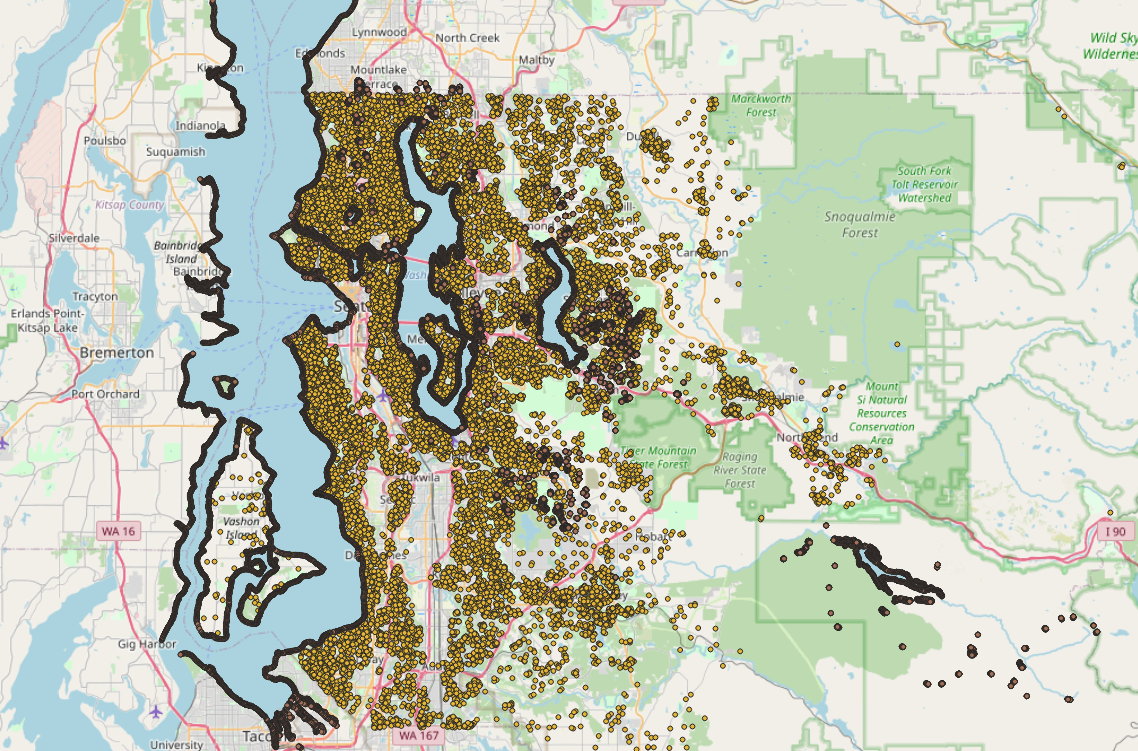

In [8]:
Image(filename='images/seattle_map_shore.png') 

This image shows the vectors used in order to calculate nearest distance to shore. 

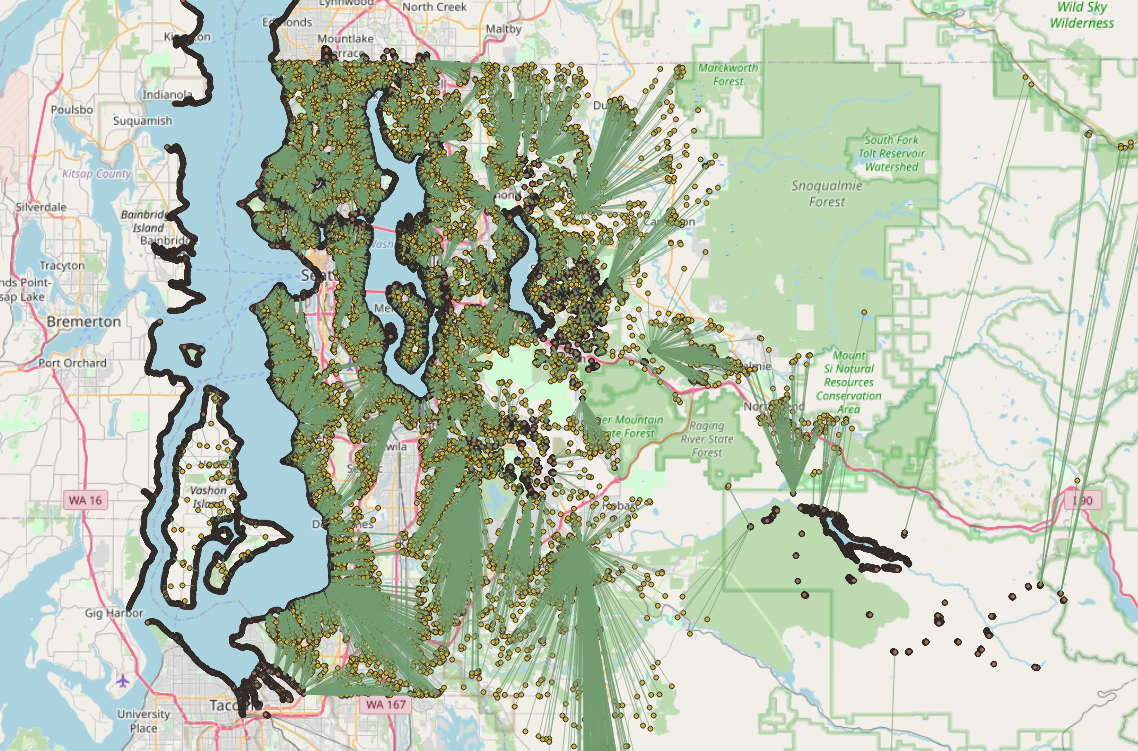

In [9]:
Image(filename='images/distance_to_shore.png') 

In [10]:
#import shoreline distance data collected from
#QGIS vector analysis
df_shores = pd.read_csv('data/shoreline_good.csv')

df_shores.head()

field_1      lat     long  Hub distance_HubDist
0        0  47.5112 -122.257              0.372917
1        1  47.7210 -122.319              0.328945
2        2  47.7379 -122.233              0.678380
3        3  47.5208 -122.393              0.070517
4        4  47.6168 -122.045              0.985156

In [11]:
df_shores = df.join(df_shores, how='left', rsuffix="other")
df_shores.rename(columns={"Hub distance_HubDist": "shoreline_distance"}, inplace=True)
df_shores.head()

id   date_sold     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode      lat  \
0      5650     1.0         NaN   0.0  ...           0.0    98178  47.5112   
1      7242     2.0         0.0   0.0  ...        1991.0    98125  47.7210   
2     10000     1.0         0.0   0.0  ...           NaN    98028  47.7379   
3      5000     1.0         0.0   0.0  ...           0.0    98136  47.5208   
4      8080     1.0         0.0   0.0  ...           0.0    98074  47.6168   

      long  sqft_living15  sqft_lot15  field_1  latother  longother  \
0 -122.257           1340        5650        0   47.5112   -122.257   
1 -122.319           1690        7639        1   47.7210   -122.319   
2 -122.233           2720        8062        2   47.7379   -122.233   
3 -122.393           1360        5000        3   47.5208   -122.393   
4 -122.045           1800        7503        4   47.6168   -122.045   

   shoreline_distance  
0            0.372917  
1            0.328945  
2            0.678380  
3            0.070517  
4            0.985156  

[5 rows x 25 columns]

In [12]:
#drop redundant columns
df_shores.drop(columns=['latother', 'longother'], inplace=True)

#gather coordinates for new shoreline houses

lat_shores = df_shores[df_shores.shoreline_distance < 0.2].lat.copy()
long_shores = df_shores[df_shores.shoreline_distance < 0.2].long.copy()
shores = list(zip(lat_shores, long_shores))

#Nearly 2500 new 'waterfront' non-null values vs old set of ~ 150
len(shores)

2420

In [13]:
#Create a map to display new 'waterfront' properties

newshore_map = folium.Map([47.6, -122.33], zoom_start=10)
for p in shores:
    lat = p[0]
    long = p[1]
    marker = folium.CircleMarker(location=[lat, long], radius=3, color='blue')
    marker.add_to(newshore_map)
newshore_map

In [14]:
#create new series for newly derived waterfront properties

new_waterfront = df_shores[df_shores.shoreline_distance < 0.20].waterfront.copy()
new_waterfront.rename('new_waterfront', inplace=True)
new_waterfront.replace(to_replace=0, value=1, inplace=True)
new_waterfront.value_counts()

1.0    2164
Name: new_waterfront, dtype: int64

In [15]:
#join to original dataframe and fill nulls
df = df_shores.join(new_waterfront)
df.new_waterfront.fillna(0, inplace=True)

### New School District Data using QGIS

### Step By Step QGIS Guide for school district data

![Map of districts and listings](images/pretty_districts_map.png)

The map above was created using some convenient QGIS built in tools. The first step was finding a useful shapefile to import into my QGIS project from before. There is alot of open source geodata available for the King County area at kingcounty.gov. I have included a link with full details for all of the metadata of the shapefile I ended up using for my school district shapefile and corresponding polygons. 

**[Metadata for School District Shapefile](https://www5.kingcounty.gov/sdc/Metadata.aspx?Layer=schdst)**


Now that I have a shapefile for school districts and a properly oriented map of the area with all listings added to the map based on their coordinates (steps 1-3 above) I can import another polygon layer (step 4 above) using my King County school district shapefile. 

However, this time I do not need to do any conversions. The points I added for each property listing are all contained within the boundaries of the polygons generated from my shapefile. All geospacial data for the properties intersects geospatial data for the polygons. Therefore, I can just add whatever property I want from the polygon layer and add it to the latlong points layer (in this case NAME, the name of the school district). After the district name was calculated for all points in the dataset, I exported it as a CSV file and imported it into my jupyter notebook as a pandas dataFrame.


<p style="font-size:2em;">toolbox > add polygon attributes to points.</p>

![QGIS tool to use](images/add_polygon_attributes.png)


<p style="font-size:2em;">choose points layer and polygon layer. Select what attributes <br><br> from the polygon layer you want to add to each point.<br><br> Here name was chosen in order to easily <br><br> manipulate as a series of my pandas dataFrame after exporting as a CVS file.</p> 

![popup_tool](images/districts_popup.png)


<p style="font-size:2em;">The result of runing this tool will be a layer with all of the data you want to export.</p>

![new layer formed](images/district_result.png)

<p style="font-size:2em;">Export the data.</p>

![export the data](images/export_csv.png)


I have describeted a more thorough explaination of this process in a blog I created for this project: [Linear Regression Model of King County Housing: Obtaining Geographical Data with Open GIS Software](https://dev.to/ddey117/roughdraft-housing-prices-1o97).


## Manipulating School District Information

In the first part of this section, I needed to adress some null values after merging my new school district data freshly imported from being manuplulated with QGIS. For each null value of the school district feature after joining to my original dataframe there is an associated zipcode. Therefore, I can easily fill these null values with the approriate school district name based on the appropriate zipcode.

While school district names are interesting on their own, they aren't enitrely useful for creating a linear regression model. Multiple Linear Regression models require numerical data to run. Therefore, I decided to conduct some research to determine the quality of the school districts in order to convert the names into a numerical format based on school district rankings.

In [16]:
#import data from QGIS
districts_df = pd.read_csv('data/districts_two.csv')


#The only field of interest on this table is NAME. field_1
#was created upon export of the data from QGIS
#but is equivalent to the index of the original dataframe.
#distance_t was a leftover property from some other
#experimenting I was doing with the software.

display(districts_df.info())
districts_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   field_1     21597 non-null  int64  
 1   lat         21597 non-null  float64
 2   long        21597 non-null  float64
 3   distance_t  21597 non-null  float64
 4   NAME        21587 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 843.8+ KB


None

field_1      lat     long  distance_t             NAME
0        0  47.5112 -122.257    0.131046          Seattle
1        1  47.7210 -122.319    0.246588          Seattle
2        2  47.7379 -122.233    0.111950       Northshore
3        3  47.5208 -122.393    1.052796          Seattle
4        4  47.6168 -122.045    0.715115  Lake Washington

In [17]:
#Create Series for School District Names
districts = districts_df.NAME

#There are ten null values that need to be addressed.
districts.isna().sum()

10

In [18]:
#Join district series to original dataframe to create new dataframe.
#This will be used to determine what school district names to fill in 
#By comparing to values in the zipcode column.

df_districts = df.join(districts).copy()

#create array to get the values of the zipcode for each index where
#the value of NAME is null
districts_array = df_districts[df_districts.NAME.isna()].zipcode.values

#update dataframe to only include data from these zipcodes
districts_df = df_districts[df_districts.zipcode.isin(districts_array)]
#value count of 10 zipcodes of interest
districts_df.NAME.value_counts()

Lake Washington      946
Federal Way          568
Issaquah             337
Mercer Island        281
Bellevue             277
Highline             208
Vashon Island        116
Northshore            29
Snoqualmie Valley     25
Name: NAME, dtype: int64

In [19]:
#sort dataframe by ascending zipcode
zip_district_names = districts_df.sort_values(by=['zipcode'])


#display percentage of school district values 
#for each zipcode of interest

for ZIP in zip_district_names.zipcode.unique():
    print(ZIP)
    display(zip_district_names[zip_district_names['zipcode'] == ZIP].NAME.value_counts(normalize=True))
    print('-----------------------------------------------------------------------')

98008


Bellevue    0.98227
Issaquah    0.01773
Name: NAME, dtype: float64

-----------------------------------------------------------------------
98023


Federal Way    1.0
Name: NAME, dtype: float64

-----------------------------------------------------------------------
98033


Lake Washington    1.0
Name: NAME, dtype: float64

-----------------------------------------------------------------------
98034


Lake Washington    0.946691
Northshore         0.053309
Name: NAME, dtype: float64

-----------------------------------------------------------------------
98040


Mercer Island    1.0
Name: NAME, dtype: float64

-----------------------------------------------------------------------
98070


Vashon Island    1.0
Name: NAME, dtype: float64

-----------------------------------------------------------------------
98075


Issaquah             0.929972
Snoqualmie Valley    0.070028
Name: NAME, dtype: float64

-----------------------------------------------------------------------
98198


Highline       0.748201
Federal Way    0.251799
Name: NAME, dtype: float64

-----------------------------------------------------------------------


In [20]:
#check values
#lake washington covers two zipcodes
#Issaquah zipcode has two null
#school district values to fill 
df_districts[df_districts.NAME.isna()].sort_values(by='zipcode').zipcode.values

array([98008, 98023, 98033, 98034, 98040, 98070, 98075, 98075, 98198,
       98198])

In [21]:
#create list of names to zip with appropriate indexes
zipcode_name_list = ['Bellevue', 'Federal Way', 
                     'Lake Washington', 'Lake Washington',
                     'Mercer Island', 'Vashon Island',
                     'Issaquah', 'Issaquah', 'Highline',
                     'Highline']

#grab apporpriate indexes
#that need null values replaced
na_NAME_indexes = list(df_districts[df_districts.NAME.isna()].sort_values(by='zipcode').index)


#create dictionary for index: school district pairs.
na_zipcode_dict =  dict(zip(na_NAME_indexes, zipcode_name_list))


#fill null values with appropriate school district names
df_districts.NAME.fillna(na_zipcode_dict, inplace=True)

### Feature Creation: School District Ranking

Now my original dataframe has a school district name associated with every given property. However, these data still need further processing to play well with linear regression.

Luckily, a website called Niche.com has already done all of the heavy lifting for me. From the website:

*The School District Academics grade is based on rigorous analysis of academic data from the U.S. Department of Education along with test scores, college data, and ratings collected from millions of Niche users.*

Please feel free to explore the information in the following links to get a understanding of Niche's rating system and data collection processes. 

[breakdown of how district ratings are calculated](https://www.niche.com/about/methodology/school-district-academics/)

[All about Niche Data Collection Process](https://www.niche.com/about/data/)


School district rankings are a very intersting feature to include for new families moving into the Seattle area. It also helps to add some geological power to our model without the need to include a large number of categorical zipcodes.

In [22]:
#find values to act as keys for ratings dict 
sorted(df_districts.NAME.unique())

['Auburn',
 'Bellevue',
 'Enumclaw',
 'Federal Way',
 'Fife',
 'Highline',
 'Issaquah',
 'Kent',
 'Lake Washington',
 'Mercer Island',
 'Northshore',
 'Renton',
 'Riverview',
 'Seattle',
 'Shoreline',
 'Skykomish',
 'Snoqualmie Valley',
 'Tahoma',
 'Tukwila',
 'Vashon Island']

In [23]:
#create a dictionary of ratings.

school_rating_dict = {'Auburn': 'B',
'Bellevue': 'A+','Enumclaw': 'B',
'Federal Way': 'C+','Fife': 'B+',
'Highline': 'C+','Issaquah': 'A+',
'Kent': 'B','Lake Washington': 'A+',
'Mercer Island': 'A+','Northshore': 'A',
'Renton': 'B-','Riverview': 'B+',
'Seattle': 'A-','Shoreline': 'A',
'Skykomish': 'B','Snoqualmie Valley': 'A-',
'Tahoma': 'A','Tukwila': 'C+',
'Vashon Island': 'A'}
print('School District Ratings\n')
print(school_rating_dict)


School District Ratings

{'Auburn': 'B', 'Bellevue': 'A+', 'Enumclaw': 'B', 'Federal Way': 'C+', 'Fife': 'B+', 'Highline': 'C+', 'Issaquah': 'A+', 'Kent': 'B', 'Lake Washington': 'A+', 'Mercer Island': 'A+', 'Northshore': 'A', 'Renton': 'B-', 'Riverview': 'B+', 'Seattle': 'A-', 'Shoreline': 'A', 'Skykomish': 'B', 'Snoqualmie Valley': 'A-', 'Tahoma': 'A', 'Tukwila': 'C+', 'Vashon Island': 'A'}


In [24]:
#initialize district Series
districts = df_districts.NAME

#replace all district names with appropriate grade
district_grades = districts.replace(school_rating_dict)



district_grades.rename('district_grade', inplace=True)


display(district_grades.value_counts())


A-    7432
A+    5283
A     2557
B     2339
C+    2339
B-    1243
B+     404
Name: district_grade, dtype: int64

In [25]:
#join series back to dataframe
df_districts = df_districts.join(district_grades)
display(df_districts.head())

id   date_sold     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
0      5650     1.0         NaN   0.0  ...    98178  47.5112 -122.257   
1      7242     2.0         0.0   0.0  ...    98125  47.7210 -122.319   
2     10000     1.0         0.0   0.0  ...    98028  47.7379 -122.233   
3      5000     1.0         0.0   0.0  ...    98136  47.5208 -122.393   
4      8080     1.0         0.0   0.0  ...    98074  47.6168 -122.045   

  sqft_living15  sqft_lot15  field_1  shoreline_distance  new_waterfront  \
0          1340        5650        0            0.372917             0.0   
1          1690        7639        1            0.328945             0.0   
2          2720        8062        2            0.678380             0.0   
3          1360        5000        3            0.070517             1.0   
4          1800        7503        4            0.985156             0.0   

              NAME  district_grade  
0          Seattle              A-  
1          Seattle              A-  
2       Northshore               A  
3          Seattle              A-  
4  Lake Washington              A+  

[5 rows x 26 columns]

In [26]:
#create dictionary to convert
#district grades to numeric values


letter_to_number = {'A+': 12, 'A': 11, 'A-': 10,
                   'B+': 9, 'B': 8, 'B-': 7,
                    'C+': 6, 'C': 5, 'C-': 4,
                   'D+': 3, 'D': 2, 'D-': 1}



print('Numerical School District Grades\n')
print(letter_to_number)


Numerical School District Grades

{'A+': 12, 'A': 11, 'A-': 10, 'B+': 9, 'B': 8, 'B-': 7, 'C+': 6, 'C': 5, 'C-': 4, 'D+': 3, 'D': 2, 'D-': 1}


In [27]:
#dictionary comprehension to replace dictionary values 
#with appropriate numerical equivalent
numeric_rating_dict = {k: letter_to_number.get(v, v) for k, v in school_rating_dict.items()}



print('Districts With Approriate Numerical Grade\n')
print(numeric_rating_dict)

Districts With Approriate Numerical Grade

{'Auburn': 8, 'Bellevue': 12, 'Enumclaw': 8, 'Federal Way': 6, 'Fife': 9, 'Highline': 6, 'Issaquah': 12, 'Kent': 8, 'Lake Washington': 12, 'Mercer Island': 12, 'Northshore': 11, 'Renton': 7, 'Riverview': 9, 'Seattle': 10, 'Shoreline': 11, 'Skykomish': 8, 'Snoqualmie Valley': 10, 'Tahoma': 11, 'Tukwila': 6, 'Vashon Island': 11}


In [28]:
#create and rename series to join to dataFrame
district_num_grades = districts.replace(numeric_rating_dict)


district_num_grades.rename('district_grade_num', inplace=True)


#join dataFrame
df = df.join(district_num_grades)


df.head()

id   date_sold     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode      lat  \
0      5650     1.0         NaN   0.0  ...           0.0    98178  47.5112   
1      7242     2.0         0.0   0.0  ...        1991.0    98125  47.7210   
2     10000     1.0         0.0   0.0  ...           NaN    98028  47.7379   
3      5000     1.0         0.0   0.0  ...           0.0    98136  47.5208   
4      8080     1.0         0.0   0.0  ...           0.0    98074  47.6168   

      long  sqft_living15  sqft_lot15  field_1  shoreline_distance  \
0 -122.257           1340        5650        0            0.372917   
1 -122.319           1690        7639        1            0.328945   
2 -122.233           2720        8062        2            0.678380   
3 -122.393           1360        5000        3            0.070517   
4 -122.045           1800        7503        4            0.985156   

   new_waterfront  district_grade_num  
0             0.0                  10  
1             0.0                  10  
2             0.0                  11  
3             1.0                  10  
4             0.0                  12  

[5 rows x 25 columns]

<AxesSubplot:xlabel='district_grade_num', ylabel='price'>

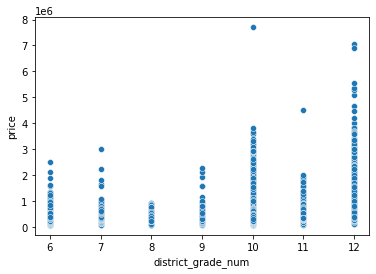

In [29]:
sns.scatterplot(x=df.district_grade_num, y=df.price)


Visualization of school district ranking geographical distrubtion.

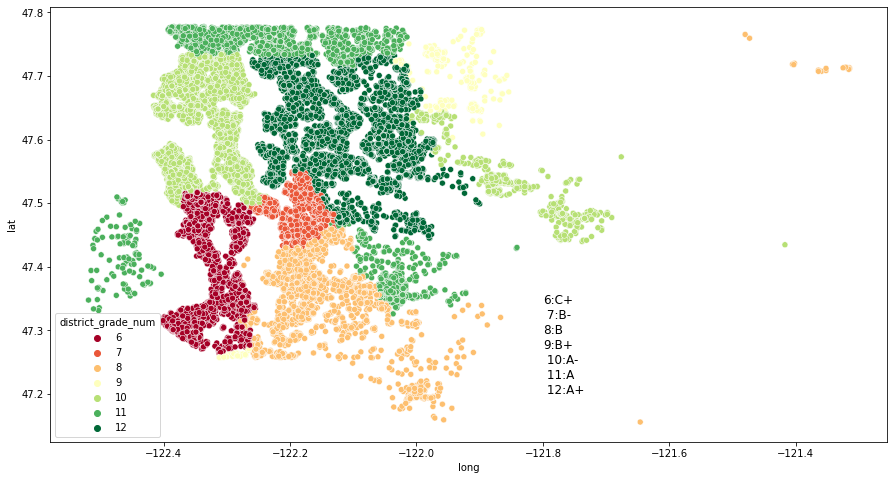

In [30]:
#create geological visulation of school districts
district_figure2 = plt.figure(figsize=(15,8))
sns.scatterplot(x=df.long, y=df.lat, hue=df.district_grade_num,
                palette='RdYlGn');

#add legend key
plt.text(x=-121.8, y=47.2, 
         s='6:C+\n 7:B-\n8:B\n9:B+\n 10:A-\n 11:A\n 12:A+',
        size=12)

#save
plt.savefig("./images/district_rank_loc.png", dpi=150)
plt.savefig("./images/district_rank_loc.pdf", dpi=150)


plt.show();

## Median Household Income GeoData


As mentioned before, there is a wealth of GeoData easily accesible online: [King County Open GIS center](https://gis-kingcounty.opendata.arcgis.com/).

Exploring this database for King County geographical information, I found another dataset that would be very interesting to add to the housing data I have so far: Median incomes for King County residents collected between the years 2012-2017. A detailed explanation of the dataset can be found here: [King County Median Income](https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::acs-median-household-income-in-the-past-12-months-in-inflation-adjusted-dollars-acs-b19013-medianhouseholdincome/about).

*Dataset title* =  ACS: Median Household Income In The Past 12 Months (In Inflation-Adjusted Dollars) / acs b19013 medianhouseholdincome.


![400 geographical income division](images/tracts10.jpeg)

Above is a visual for the survey tract divisions. All of the income survey data is divided by these tracts. The shapefile contains around 400 different polygons that each contain information for median household income of King County residents based on continuous sampling from the years 2012 to 2017. 

It is expected to see a linear relationship between income and housing prices. In practice I can add a 'median income' feature to each property which indicates the median income of their associated neighborhood/area the data was sampled from. 

Essentially, there are 398 income 'zones' based on survey that I can include in my dataset for King County Housing. This is another numerical feature I can have with some geological power behind it as well.  

The same steps were carried out using QGIS software as described above in the Step By Step QGIS Guide for School District Data. The atribute of interest (median income of surrounding area) was added from the shapefile to each property that overlaped with their corresponding polygons. 


## Per Capita Income

Another interesting variable I chanced upon is per capita income instead of household income. This will better reflect individual incomes of each geological tract (~400 geological divisions mentioned above). This data uses the same geological tract and survey methods to provide this data. Detailed information on metadata and collection can be found here:

[per_capita_income](https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::acs-per-capita-income-in-the-past-12-months-in-inflation-adjusted-dollars-acs-b19301-percapitaincome/about)

## Median Rent of Surrounding Area

Using the same underlying shape layer data (398 geological divisions mentioned previously), I was able to also add a feature describing the median rent of the surrounding area using QGIS software. The same method and sources as for median income and income per capita were used. 

Feel free to visit this link for more information on the source data.

[median rent](https://gis-kingcounty.opendata.arcgis.com/datasets/acs-median-contract-rent-dollars-acs-b25058-mediancontractrent/explore?location=47.431250%2C-121.809050%2C10.40)

In [31]:
#import income data derived from QGIS software and Open GIS King County information
incomes_df = pd.read_csv('data/median_income.csv')
percap_df = pd.read_csv('data/per_cap_income.csv')
rent_df = pd.read_csv('data/median_monthly_rent.csv')
#initialize income series
incomes = incomes_df['E19013171'].copy()
percap_incomes = percap_df['E19301166'].copy()
rent_s = rent_df['E25058232'].copy()
#rename for clarity
incomes.rename('median_household_income', inplace=True)
percap_incomes.rename('income_per_capita', inplace=True)
rent_s.rename('median_rent', inplace=True)
#add income series to dataframe
df = df.join(incomes)
df = df.join(percap_incomes)
df = df.join(rent_s)

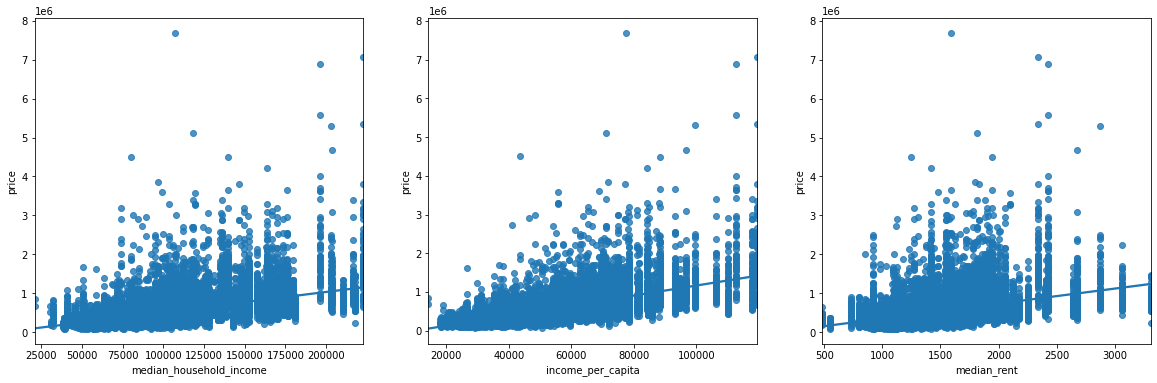

In [32]:
#inspect correlations
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.regplot(x='median_household_income',y='price', data=df)

plt.subplot(1,3,2)
sns.regplot(x='income_per_capita',y='price', data=df)

plt.subplot(1,3,3)
sns.regplot(x='median_rent',y='price', data=df)

plt.show();

## Washington State Health Department Data


The Washington State Department of Health has created a very intersting tool for exploring the state of Washington: the Washington Environmental Health Disparities Map. 


Taken from the website linked below:

"The map is displayed on WTN's Information by Location (IBL) tool. The data on the map include 19 indicators and are divided into four themes:

Environmental Exposures (NOx-deisel emissions; ozone concentration; PM2.5 Concentration; populations near heavy traffic roadways; toxic release from facilities (RSEI model))

Environmental Effects (lead risk from housing; proximity to hazardous waste treatment, storage, and disposal facilities (TSDFs); proximity to National Priorities List sites (Superfund Sites); proximity to Risk Management Plan (RMP) facilties; wastewater discharge)

Sensitive Populations (death from cardiovascular disease; low birth weight)

Socioeconomic Factors (limited English; no high school diploma; poverty; race - people of color; transportation expense; unaffordable housing; unemployed)"

Please follow this link to explore the tool that was created by the health department and to review interesting information on how health is being tracked in the state. 

[health_disparities_index_information](https://www.doh.wa.gov/DataandStatisticalReports/WashingtonTrackingNetworkWTN/InformationbyLocation/WashingtonEnvironmentalHealthDisparitiesMap)


I am interested in including the aggregate information index provided by the health department: The Health Disparity Index. A helpful graphic on how this is calculated is provided below. 


![health_disparity_index_graphic](images/health_disparity_graphic.png)


Luckily, the GIS opendata website I have been using to access all of my geodata has this index coventialy stored as a shapefile. Using the same tactics as for income and school districts, I add the polygon attributes to the latlong points of my original data and imported the data back into my jupyter notebook.

A higher rank corresponds with poorer living conditions, and is expected to have a negative correlation with price. 

In [33]:
#import data processed using QGIS software
health_disparity_df = pd.read_csv('data/health_disparity_index.csv')
health_disparity_df.head()

field_1  EHD_decile
0        0         8.0
1        1         7.0
2        2         3.0
3        3         6.0
4        4         1.0

In [34]:
#create series
health_disparities = health_disparity_df['EHD_decile'].copy()
#rename for clairty
health_disparities.rename('health_disparity_index', inplace=True)
#join to original dataframe
df = df.join(health_disparities)

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


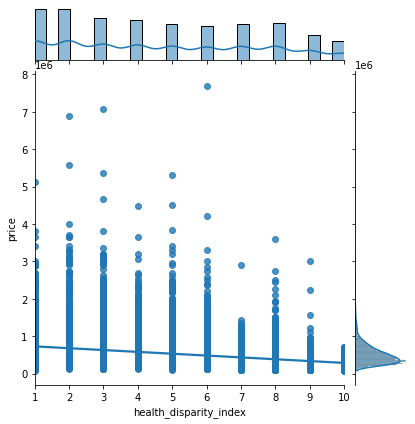

In [35]:
#inspect correlation
sns.jointplot('health_disparity_index','price', data=df, kind='reg');

## Common Points of Interest: Museums and Stadiums

The opendata GIS dashboard also included some easily accesable data in the form of a CSV file: common points of interest of King County. I wanted to add this as a way to manipulate geodata without using an QGIS software.

The data contains codes for 45 different domains which describe various different types of interesting locations. 

After reviewing the metadata provided by the King Count GIS center, I selected two domains of interest for my project: Museums and Stadiums. 


Feel free to explore the metadata yourself at the following link:
[points_of_interest](https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::wa-doh-environmental-health-disparities-index-calculated-for-king-county-wadohehdindex-area/about)


The table provided by the King COunty arcgis website also includes columns for geological coordinates and zipcodes. I decided to collect index values for zipcodes that contain either a museum or a stadium. After collecting the index values, I created boolean feature describing whether each property is in the same zipcode as a museum, and a seperate boolean feature describing whether each proiperty is in the same zipcode as a stadium.

In [36]:
POI_df = pd.read_csv('data/Common_Points_of_Interest_for_King_County____common_interest_point.csv')

POI_df.head()

X          Y  OBJECTID  FEATURE_ID     ESITE  CODE  \
0 -122.319489  47.408128         1        1355  382772.0   390   
1 -122.322633  47.705323         2        2729  269699.0   600   
2 -122.331770  47.594909         3        2772       0.0   240   
3 -122.056985  47.635016         4         660  376688.0   300   
4 -122.205575  47.772486         5         266       0.0   600   

                          NAME                    ABB_NAME  \
0           Des Moines Library              Des Moines Lib   
1   Northgate Community Center                Northgate CC   
2            CenturyLink Field           CenturyLink Field   
3  Sahalee Golf & Country Club  Sahalee GC &  Country Club   
4            William Penn Park           William Penn Park   

                      ADDRESS  ZIPCODE  
0            21620 11th Ave S    98198  
1            10510 5th Ave NE    98125  
2        800 Occidental Ave S    98104  
3            21200 NE 28th St    98074  
4  100th Ave NE & NE 200th St    98001

In [37]:
#grab list of zipcodes for various points of interest
museum_zipcodes = POI_df[POI_df.CODE == 480].ZIPCODE.values
stadium_zipcodes = POI_df[POI_df.CODE == 240].ZIPCODE.values
golf_zipcodes = POI_df[POI_df.CODE == 300].ZIPCODE.values

#find what listings are in selected zipcodes
#and grab indexes
museum_zip_indexes = df[df.zipcode.isin(museum_zipcodes)].index
stadium_zip_indexes = df[df.zipcode.isin(stadium_zipcodes)].index
golf_indexes = df[df.zipcode.isin(golf_zipcodes)].index

In [38]:
#create new boolean features for zipcodes
#that contain selected points of interest

df.loc[museum_zip_indexes, 'museum_zipcode'] = 1
df['museum_zipcode'].fillna(0, inplace=True)

df.loc[stadium_zip_indexes, 'stadium_zipcode'] = 1
df['stadium_zipcode'].fillna(0, inplace=True)

df.loc[golf_indexes, 'golf_zipcode'] = 1
df['golf_zipcode'].fillna(0, inplace=True)

display(df['museum_zipcode'].value_counts())
display(df['stadium_zipcode'].value_counts())
df['golf_zipcode'].value_counts()

0.0    17585
1.0     4012
Name: museum_zipcode, dtype: int64

0.0    18615
1.0     2982
Name: stadium_zipcode, dtype: int64

0.0    12644
1.0     8953
Name: golf_zipcode, dtype: int64

In [39]:
df.corr().price

id                        -0.016772
price                      1.000000
bedrooms                   0.308787
bathrooms                  0.525906
sqft_living                0.701917
sqft_lot                   0.089876
floors                     0.256804
waterfront                 0.276295
view                       0.395734
condition                  0.036056
grade                      0.667951
sqft_above                 0.605368
yr_built                   0.053953
yr_renovated               0.129599
zipcode                   -0.053402
lat                        0.306692
long                       0.022036
sqft_living15              0.585241
sqft_lot15                 0.082845
field_1                    0.027436
shoreline_distance        -0.249941
new_waterfront             0.271747
district_grade_num         0.399726
median_household_income    0.504108
income_per_capita          0.639008
median_rent                0.413495
health_disparity_index    -0.374280
museum_zipcode             0

## King County GeoData: Parks 

Being near a nice park is always a plus for a family. Here I have decided to import data from the King County GIS opendata website again.


![King County Parks](images/King_County_Parks.png)

As shown in the image above, I obtained a dataset of geological coordinates and their associated park names. The dataset contains over 2000 parks. I decided to filter the data first before exporting again as a CSV file to perform the built in vector analysis with the QGIS software.

In [40]:
#import data from the KingCounty GIS Open Data website
park_data = pd.read_csv('data/Park_Label_Points___park_label_point.csv')

In [41]:
#check column names
park_data.columns

Index(['X', 'Y', 'OBJECTID', 'KC_Fac_FID', 'KCParkFID', 'SiteName', 'SiteType',
       'Owner', 'OwnerType', 'Manager', 'ManageType', 'Maintd_By', 'MaintType',
       'Label_Type'],
      dtype='object')

I decided to create a list of popular parks in the King County region after a bit of exploration on google. The parks were chosen as a great mix for the whole family. Below I have linked the websites that I used to create this list:

[Project Nature Blog](https://www.projectnaturewa.com/explore-amazing-parks-throughout-king-county/)

[King County Parks and Rec](https://kingcounty.gov/services/parks-recreation/parks/parks-and-natural-lands.aspx)

[King County Parks](https://kingcountyparks.org/2016/04/07/5-king-county-parks-to-you-need-to-check-out-this-spring/)

[Parent Map](https://www.parentmap.com/article/the-wildest-biggest-best-parks-around-seattle)

In [42]:
park_list = ['Snoqualmie Point Park',
'Iron Horse State Park',
'Olallie State Park',
'Fisher Creek Park',
'Medina Beach Park',
'Duthie Hill Park',             
'Clark Lake Park',
'Luther Burbank Park',
'Cal Anderson Park',
'Marymoor Park',
'Washington Park Arboretum',
'Mercer Slough Nature Park',
'Warren G. Magnuson Park',            
'Saint Edward State Park',
'Lincoln Park',
'Kubota Gardens',
'Seward Park',
'Newcastle Beach Park',
'Georgetown Playfield',
'Dick Thurnau Memorial Park',
'Dockton Forest',
'Cougar Mountain Regional Wildland Park',
'Carkeek Park',
'Seahurst Park',
'Discovery Park',
'Volunteer Park']
len(park_list)           

26

In [43]:
#Filter data to only include hand picked parks
cool_parks = park_data[park_data.SiteName.isin(park_list)]

len(cool_parks.SiteName.unique())

26

In [44]:
#export data in order to perform
#vector analysis with QGIS software
cool_parks.to_csv('data/park_data.csv')


The image below was captured after using the QGIS software to create vectors from each property to the closest park on the list. I then added this data back to the initial dataframe in order to create a new boolean feature: Near Park. I decided to use 4 miles as the cutoff.

Therefore, the new feature will indicate whether the property is within 4 miles of one of these interesting parks.

![QGIS Park Vectors](images/park_vectors.png)

In [45]:
#import vector data from QGIS

parks_df = pd.read_csv('data/top_park_distance.csv')

top_parks = parks_df.park_distance1_HubDist

top_parks.rename('dist_to_park', inplace=True)

#filter data

near_park4 = top_parks[top_parks < 4]

#join data back
df = df.join(near_park4)

In [46]:
#This block of code replaces all distances within 4 miles 
#with a 1 and fills all other values with a zero.

df['near_park'] = df['dist_to_park'].apply(lambda x: 1 if not pd.isnull(x) else np.nan)
df.near_park.fillna(0, inplace=True)
df.near_park.value_counts()

1.0    16143
0.0     5454
Name: near_park, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       21597 non-null  int64  
 1   date_sold                21597 non-null  object 
 2   price                    21597 non-null  float64
 3   bedrooms                 21597 non-null  int64  
 4   bathrooms                21597 non-null  float64
 5   sqft_living              21597 non-null  int64  
 6   sqft_lot                 21597 non-null  int64  
 7   floors                   21597 non-null  float64
 8   waterfront               19221 non-null  float64
 9   view                     21534 non-null  float64
 10  condition                21597 non-null  int64  
 11  grade                    21597 non-null  int64  
 12  sqft_above               21597 non-null  int64  
 13  sqft_basement            21597 non-null  object 
 14  yr_built              

# SCRUB

In [48]:
#Keeping these as unique instances.
#After investigation, these were determined
#To be houses sold twice on
#two seperate dates

df.id.duplicated().sum()

177

In [49]:
#check dataframe for null values
df.isna().sum()

id                            0
date_sold                     0
price                         0
bedrooms                      0
bathrooms                     0
sqft_living                   0
sqft_lot                      0
floors                        0
waterfront                 2376
view                         63
condition                     0
grade                         0
sqft_above                    0
sqft_basement                 0
yr_built                      0
yr_renovated               3842
zipcode                       0
lat                           0
long                          0
sqft_living15                 0
sqft_lot15                    0
field_1                       0
shoreline_distance            0
new_waterfront                0
district_grade_num            0
median_household_income       1
income_per_capita             1
median_rent                  50
health_disparity_index       26
museum_zipcode                0
stadium_zipcode               0
golf_zip

#### DateTime

Date sold was converted to a datetime datatype below and two new features were created to analyize price in terms of years and months.

In [50]:
df['date_sold'] = pd.to_datetime(df['date_sold'])
df['year_sold'] = df.date_sold.dt.year
df['month_sold'] = df.date_sold.dt.month
df.head()

id  date_sold     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  income_per_capita  median_rent  \
0      5650     1.0         NaN   0.0  ...            36991.0       1032.0   
1      7242     2.0         0.0   0.0  ...            37334.0       1341.0   
2     10000     1.0         0.0   0.0  ...            51943.0       1725.0   
3      5000     1.0         0.0   0.0  ...            64829.0       1401.0   
4      8080     1.0         0.0   0.0  ...            66934.0       1699.0   

   health_disparity_index museum_zipcode  stadium_zipcode  golf_zipcode  \
0                     8.0            0.0              0.0           0.0   
1                     7.0            0.0              0.0           1.0   
2                     3.0            0.0              0.0           1.0   
3                     6.0            0.0              0.0           0.0   
4                     1.0            0.0              0.0           1.0   

   dist_to_park  near_park  year_sold  month_sold  
0      0.440925        1.0       2014          10  
1      2.323414        1.0       2014          12  
2      0.939630        1.0       2015           2  
3      0.730600        1.0       2014          12  
4           NaN        0.0       2015           2  

[5 rows x 36 columns]

#### Year Renovated

There are a large number of null values in the yr_renovated column that must be addressed.

In [51]:
df.yr_renovated.value_counts(dropna=False, normalize=True)

0.0       0.787656
NaN       0.177895
2014.0    0.003380
2003.0    0.001435
2013.0    0.001435
            ...   
1944.0    0.000046
1948.0    0.000046
1976.0    0.000046
1934.0    0.000046
1953.0    0.000046
Name: yr_renovated, Length: 71, dtype: float64

In [52]:
#fill all null values with zero
df.yr_renovated.fillna(0, inplace=True)

In [53]:
#sanity check
df.yr_renovated.isna().sum()

0

#### Age of Houses

After exploring different options for processing variables related to time in a way to fit my model in a meaningful way, I decided to create two new booleans for whether the house is newly constructed and another boolean for whether or not the house was constructed before World War II. In terms of the age of a house, these seem to be the most interesting factors to consider as well as any recent renovations. 

In [54]:
#feature creation
df['age_at_sale'] = df.year_sold - df.yr_built


# #initiate new series in order to
# #construct boolean describing
# # #whether or not the home is newly constructed
# df['newly_constructed'] = df[df['age_at_sale'] <= 2].age_at_sale

# # #construct boolean
# df['newly_constructed'] = df['newly_constructed'].apply(lambda x: 1 if not pd.isnull(x) else np.nan)
# df.newly_constructed.fillna(0, inplace=True)


# #initiate series in order to
# #construct boolean describing
# #if the house was constructed before
# #the end of WWII
# df['old_home'] = df.loc[df.age_at_sale >= 50].age_at_sale

# # #construct boolean
# df['old_home'] = df['old_home'].apply(lambda x: 1 if not pd.isnull(x) else np.nan)
# df.old_home.fillna(0, inplace=True)



#create new boolean feature
#that describes whether
#a property was renovated within
#a decade before being sold

df['recently_renovated'] = 0
row_to_update2 = df[df.year_sold - df.yr_renovated <=10].index
column_to_update2 = ['recently_renovated']
df.loc[row_to_update2, column_to_update2] = 1

#### Basement

In [55]:
#inspect column
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1960.0        1
2570.0        1
1008.0        1
3480.0        1
2130.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [56]:
#replace ? with 0 and convert to float datatype

df['sqft_basement'] = df['sqft_basement'].map(lambda x: x.replace("?", "0"))
df['sqft_basement'] = df['sqft_basement'].apply(pd.to_numeric)

In [57]:
#sanity check
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [58]:
df[df.sqft_basement > 0]

id  date_sold      price  bedrooms  bathrooms  sqft_living  \
1      6414100192 2014-12-09   538000.0         3       2.25         2570   
3      2487200875 2014-12-09   604000.0         4       3.00         1960   
5      7237550310 2014-05-12  1230000.0         4       4.50         5420   
8      2414600126 2015-04-15   229500.0         3       1.00         1780   
10     1736800520 2015-04-03   662500.0         3       2.50         3560   
...           ...        ...        ...       ...        ...          ...   
21572  2767600688 2014-11-13   414500.0         2       1.50         1210   
21574  7430200100 2014-05-14  1220000.0         4       3.50         4910   
21579  1972201967 2014-10-31   520000.0         2       2.25         1530   
21590  7936000429 2015-03-26  1010000.0         4       3.50         3510   
21591  2997800021 2015-02-19   475000.0         3       2.50         1310   

       sqft_lot  floors  waterfront  view  ...  health_disparity_index  \
1          7242     2.0         0.0   0.0  ...                     7.0   
3          5000     1.0         0.0   0.0  ...                     6.0   
5        101930     1.0         0.0   0.0  ...                     1.0   
8          7470     1.0         0.0   0.0  ...                     9.0   
10         9796     1.0         NaN   0.0  ...                     5.0   
...         ...     ...         ...   ...  ...                     ...   
21572      1278     2.0         0.0   0.0  ...                     2.0   
21574      9444     1.5         0.0   0.0  ...                     2.0   
21579       981     3.0         0.0   0.0  ...                     5.0   
21590      7200     2.0         0.0   0.0  ...                     5.0   
21591      1294     2.0         0.0   0.0  ...                     1.0   

       museum_zipcode  stadium_zipcode  golf_zipcode  dist_to_park  near_park  \
1                 0.0              0.0           1.0      2.323414        1.0   
3                 0.0              0.0           0.0      0.730600        1.0   
5                 0.0              0.0           0.0           NaN        0.0   
8                 0.0              0.0           0.0      0.675511        1.0   
10                0.0              0.0           0.0      1.922545        1.0   
...               ...              ...           ...           ...        ...   
21572             1.0              0.0           0.0      2.228119        1.0   
21574             0.0              0.0           1.0      2.030886        1.0   
21579             0.0              1.0           0.0      2.127601        1.0   
21590             0.0              0.0           0.0      1.558800        1.0   
21591             0.0              0.0           0.0      3.243806        1.0   

       year_sold  month_sold  age_at_sale  recently_renovated  
1           2014          12           63                   0  
3           2014          12           49                   0  
5           2014           5           13                   0  
8           2015           4           55                   0  
10          2015           4           50                   0  
...          ...         ...          ...                 ...  
21572       2014          11            7                   0  
21574       2014           5            7                   0  
21579       2014          10            8                   0  
21590       2015           3            6                   0  
21591       2015           2            7                   0  

[8317 rows x 38 columns]

In [59]:
#create new boolean feature
#that describes whether
#a property has a basement

df['has_basement'] = 0
row_to_update3 = df[df.sqft_basement > 0].index
column_to_update3 = ['has_basement']
df.loc[row_to_update3, column_to_update3] = 1
df.has_basement.value_counts()

0    13280
1     8317
Name: has_basement, dtype: int64

The tail ends of some suspect variables were investigated. Below are the steps I implemented in order to determine if the house with 33 bedrooms and a living space of 1620 sqft was an outlier or a typo. 

I first calculated the median of the living area for each bedroom of the dataset. I then multiplied that value by 3 and 33 under the assumption that perhaps the 3 key was hit twice upon data entry.

After comparing the two values, it seems very reasonable to change the 33 bedroom house to a 3 bedroom house.

In [60]:
df.bedrooms.describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [61]:
df.sort_values(['bedrooms'], ascending=False)

id  date_sold      price  bedrooms  bathrooms  sqft_living  \
15856  2402100895 2014-06-25   640000.0        33       1.75         1620   
8748   1773100755 2014-08-21   520000.0        11       3.00         3000   
13301   627300145 2014-08-14  1150000.0        10       5.25         4590   
19239  8812401450 2014-12-29   660000.0        10       3.00         2920   
15147  5566100170 2014-10-29   650000.0        10       2.00         3610   
...           ...        ...        ...       ...        ...          ...   
12472  1172000150 2014-08-29   238000.0         1       1.00          530   
13316  4356200120 2014-10-23   248000.0         1       1.00          790   
7010    203100460 2014-09-24   400000.0         1       1.00          530   
3578   1925069006 2014-12-03   355000.0         1       0.75          530   
14373  7518503065 2014-06-23   335000.0         1       1.00          720   

       sqft_lot  floors  waterfront  view  ...  museum_zipcode  \
15856      6000     1.0         0.0   0.0  ...             0.0   
8748       4960     2.0         0.0   0.0  ...             0.0   
13301     10920     1.0         0.0   2.0  ...             1.0   
19239      3745     2.0         0.0   0.0  ...             0.0   
15147     11914     2.0         0.0   0.0  ...             0.0   
...         ...     ...         ...   ...  ...             ...   
12472      6350     1.0         0.0   0.0  ...             0.0   
13316     12000     1.0         0.0   0.0  ...             0.0   
7010      13679     1.0         0.0   0.0  ...             0.0   
3578      33278     1.0         0.0   2.0  ...             0.0   
14373      5100     1.0         0.0   0.0  ...             1.0   

       stadium_zipcode  golf_zipcode  dist_to_park  near_park  year_sold  \
15856              1.0           0.0      2.045284        1.0       2014   
8748               0.0           0.0      2.307764        1.0       2014   
13301              1.0           0.0           NaN        0.0       2014   
19239              0.0           0.0      2.297604        1.0       2014   
15147              0.0           0.0      0.773124        1.0       2014   
...                ...           ...           ...        ...        ...   
12472              1.0           0.0      0.924760        1.0       2014   
13316              0.0           0.0      0.125162        1.0       2014   
7010               0.0           0.0           NaN        0.0       2014   
3578               0.0           1.0      1.760549        1.0       2014   
14373              0.0           0.0      1.995060        1.0       2014   

       month_sold  age_at_sale  recently_renovated  has_basement  
15856           6           67                   0             1  
8748            8           96                   0             1  
13301           8            6                   0             1  
19239          12          101                   0             1  
15147          10           56                   0             1  
...           ...          ...                 ...           ...  
12472           8           73                   0             0  
13316          10           96                   0             0  
7010            9           65                   0             0  
3578           12           64                   0             0  
14373           6          107                   0             0  

[21597 rows x 39 columns]

In [62]:
#calculate the living space of eac bedroom in the dataset
df['living_per_bed'] = df.sqft_living/df.bedrooms

In [63]:
#compare these two values to 
#the given sqft_area of the 33 bedroom house
print(df.living_per_bed.median() * 33)
print(df.living_per_bed.median() * 3)

19030.0
1730.0


In [64]:
#update the bedroom value to 3 at 
#target position
df.iat[15856, 3] = 3

In [65]:
df.iloc[15856]

id                                  2402100895
date_sold                  2014-06-25 00:00:00
price                                   640000
bedrooms                                     3
bathrooms                                 1.75
sqft_living                               1620
sqft_lot                                  6000
floors                                       1
waterfront                                   0
view                                         0
condition                                    5
grade                                        7
sqft_above                                1040
sqft_basement                              580
yr_built                                  1947
yr_renovated                                 0
zipcode                                  98103
lat                                    47.6878
long                                  -122.331
sqft_living15                             1330
sqft_lot15                                4700
field_1      

#### View

In [66]:
df.view.value_counts(dropna=False, normalize=True)

0.0    0.899292
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
NaN    0.002917
Name: view, dtype: float64

In [67]:
#Decided to drop view column as I am not interested
#in including it in my model

df.drop(columns='view', inplace=True)

### Area

In [68]:
#create dataframe to explore 
#relationship between all variables
#that describe property area

df_area = df[['sqft_living', 'sqft_lot',
              'sqft_above', 'sqft_living15',
             'sqft_lot15']].copy()

df_area.corr()

sqft_living  sqft_lot  sqft_above  sqft_living15  sqft_lot15
sqft_living       1.000000  0.173453    0.876448       0.756402    0.184342
sqft_lot          0.173453  1.000000    0.184139       0.144763    0.718204
sqft_above        0.876448  0.184139    1.000000       0.731767    0.195077
sqft_living15     0.756402  0.144763    0.731767       1.000000    0.183515
sqft_lot15        0.184342  0.718204    0.195077       0.183515    1.000000

In [69]:
#Drop columns that not interested in or are
#out of scope for the project. 
#The area of the living area and lot area
#seem sufficient for the model

df.drop(columns=['sqft_above', 'sqft_living15',
             'sqft_lot15'], inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       21597 non-null  int64         
 1   date_sold                21597 non-null  datetime64[ns]
 2   price                    21597 non-null  float64       
 3   bedrooms                 21597 non-null  int64         
 4   bathrooms                21597 non-null  float64       
 5   sqft_living              21597 non-null  int64         
 6   sqft_lot                 21597 non-null  int64         
 7   floors                   21597 non-null  float64       
 8   waterfront               19221 non-null  float64       
 9   condition                21597 non-null  int64         
 10  grade                    21597 non-null  int64         
 11  sqft_basement            21597 non-null  float64       
 12  yr_built                 21597 n

## Data Exploration

In [71]:
df.columns

Index(['id', 'date_sold', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'field_1', 'shoreline_distance', 'new_waterfront', 'district_grade_num',
       'median_household_income', 'income_per_capita', 'median_rent',
       'health_disparity_index', 'museum_zipcode', 'stadium_zipcode',
       'golf_zipcode', 'dist_to_park', 'near_park', 'year_sold', 'month_sold',
       'age_at_sale', 'recently_renovated', 'has_basement', 'living_per_bed'],
      dtype='object')

In [72]:
df1 = df.drop(columns=['id', 'date_sold',
                       'waterfront', 'yr_built',
                       'yr_renovated', 'zipcode',
                       'lat', 'long', 'year_sold',
                       'living_per_bed', 'field_1',
                       'shoreline_distance', 'dist_to_park',
                      'sqft_basement'])

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    21597 non-null  float64
 1   bedrooms                 21597 non-null  int64  
 2   bathrooms                21597 non-null  float64
 3   sqft_living              21597 non-null  int64  
 4   sqft_lot                 21597 non-null  int64  
 5   floors                   21597 non-null  float64
 6   condition                21597 non-null  int64  
 7   grade                    21597 non-null  int64  
 8   new_waterfront           21597 non-null  float64
 9   district_grade_num       21597 non-null  int64  
 10  median_household_income  21596 non-null  float64
 11  income_per_capita        21596 non-null  float64
 12  median_rent              21547 non-null  float64
 13  health_disparity_index   21571 non-null  float64
 14  museum_zipcode        

In [74]:
#fill missing values with median values

med_income = df1.loc[df1.median_household_income.isna()].index
cap_income = df1.loc[df1.income_per_capita.isna()].index
health = df1.loc[df1.health_disparity_index.isna()].index
rent = df1.loc[df1.median_rent.isna()].index


df1.loc[med_income, 'median_household_income'] = df1.median_household_income.median()
df1.loc[cap_income, 'income_per_capita'] = df1.income_per_capita.median()
df1.loc[health, 'health_disparity_index'] = df1.health_disparity_index.median()
df1.loc[rent, 'median_rent'] = df1.median_rent.median()


df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    21597 non-null  float64
 1   bedrooms                 21597 non-null  int64  
 2   bathrooms                21597 non-null  float64
 3   sqft_living              21597 non-null  int64  
 4   sqft_lot                 21597 non-null  int64  
 5   floors                   21597 non-null  float64
 6   condition                21597 non-null  int64  
 7   grade                    21597 non-null  int64  
 8   new_waterfront           21597 non-null  float64
 9   district_grade_num       21597 non-null  int64  
 10  median_household_income  21597 non-null  float64
 11  income_per_capita        21597 non-null  float64
 12  median_rent              21597 non-null  float64
 13  health_disparity_index   21597 non-null  float64
 14  museum_zipcode        

In [75]:
# #drop row where no informationf or median household income
# df1.drop(df1[df1.median_household_income.isna()].index, inplace=True)
# df1.drop(df1[df1.health_disparity_index.isna()].index, inplace=True)
# df1.drop(df1[df1.median_rent.isna()].index, inplace=True)

#### Distributions of Unfiltered Data

There is a very large right skew in price, and even more dramatic one in sqft_lot. There is also a large right skew for sqft_living. The three income features appear fairly normal already. They each have righy skews but less dramatic than the other features mentioned previously. There is a right skew on the age_at_sale feature as well. 

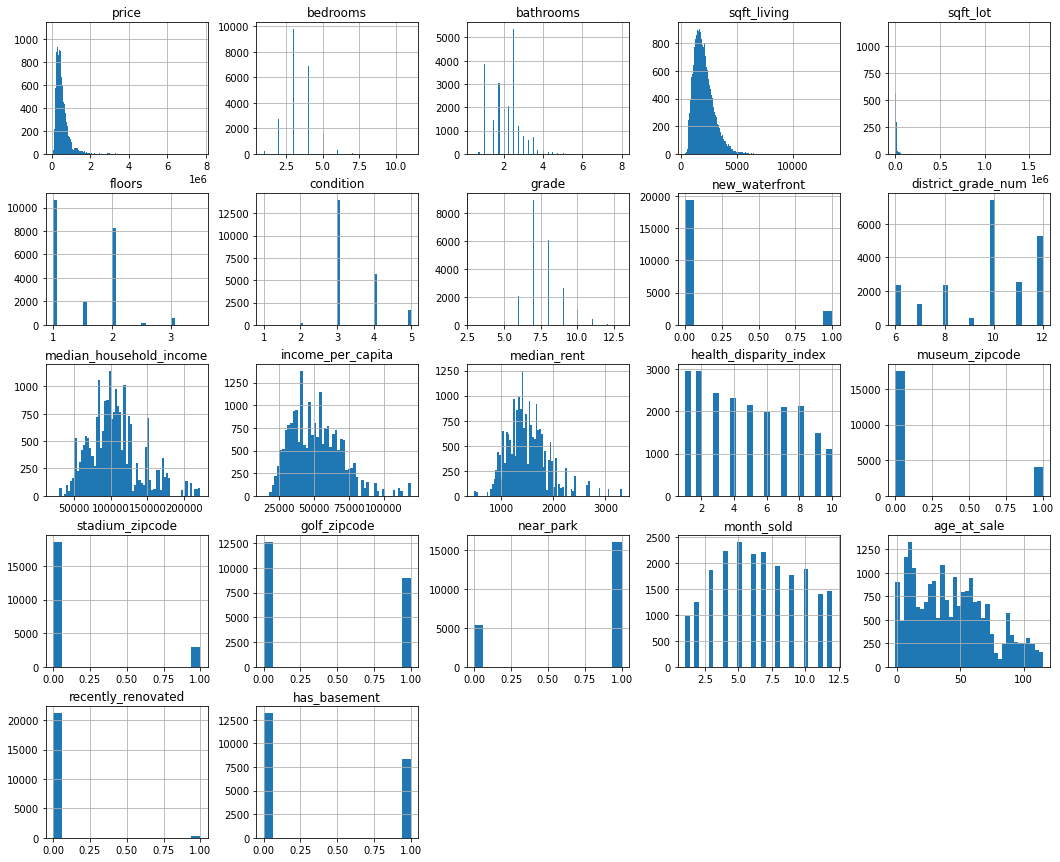

In [76]:
# create histogram for each column
df1.hist(figsize = (18, 15), bins = 'auto');

In [77]:
# function to plot boxplots against the dependent variable
def boxplot_cols(df, dv):
    '''Takes a dataframe and a dependent variable and prints box plots of
    each varible agains the dependent variable'''
    
    cols = df.columns
    
    #calculate number of rows assuming 3 plots per row
    rows = len(cols) // 3 + bool(len(cols) % 3)
    
    fig, axs = plt.subplots(rows, 3, figsize=(12,rows*3))
    
    # flatten the axs variable so the can be accessed sequetially
    axs = np.array(axs).flatten()

    for n, col in enumerate(cols):
        sns.boxplot(x=df[col], y=dv, ax=axs[n])
        plt.xlabel(col)
    
    # remove axis that are not in use
    for n in range(n+1,rows*3):
        axs[n].set_axis_off()
        
    plt.tight_layout()

In [78]:
# function to plot scatterplots against the dependent variable
def scatterplot_cols(df, dv):
    '''Takes a dataframe and a dependent variable and prints box plots of
    each varible agains the dependent variable'''
    
    cols = df.columns
    
    #calculate number of rows assuming 3 plots per row
    rows = len(cols) // 3 + bool(len(cols) % 3)
    
    fig, axs = plt.subplots(rows, 3, figsize=(12,rows*3))
    
    # flatten the axs variable so the can be accessed sequetially
    axs = np.array(axs).flatten()

    for n, col in enumerate(cols):
        sns.scatterplot(x=df[col], y=dv, ax=axs[n])
        plt.xlabel(col)
    
    # remove axis that are not in use
    for n in range(n+1,rows*3):
        axs[n].set_axis_off()
        
    plt.tight_layout()

In [79]:
#purely categorical or boolean
categoricals = ['near_park', 'new_waterfront',
               'has_basement', 'recently_renovated',
               'floors', 'month_sold', 'museum_zipcode',
               'stadium_zipcode', 'golf_zipcode'] 

In [80]:
#categories with order
#will treat as continuous
ordinals = ['bedrooms', 'bathrooms', 'grade',
           'condition', 'district_grade_num',
           'health_disparity_index']

In [81]:
continuous = ['sqft_living', 'sqft_lot',
             'age_at_sale', 'median_household_income', 
            'district_grade_num', 'condition',
            'grade', 'income_per_capita',
             'health_disparity_index', 
              'bedrooms', 'bathrooms', 'median_rent']

##### Unfilterd Categoricals: Price Target.

There are too many outliers in the data to easily interpret any of these boxplots. It looks like most of the booleans do have some sort of affect on price, but it unclear without removing the outliers.

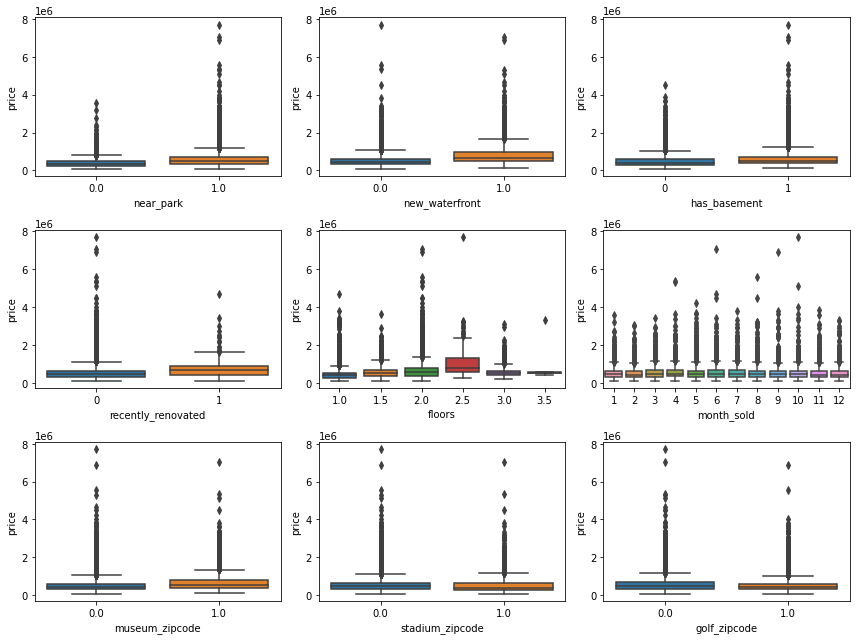

In [82]:
boxplot_cols(df1[categoricals], df1.price)

##### Unfilterd Categoricals: Rent Target.

There appear to be a lot fewer outliers for rent as compared to price in relation to each categorical feature. The waterfront, park, and museum features seem to have the strongest correlations with rent.

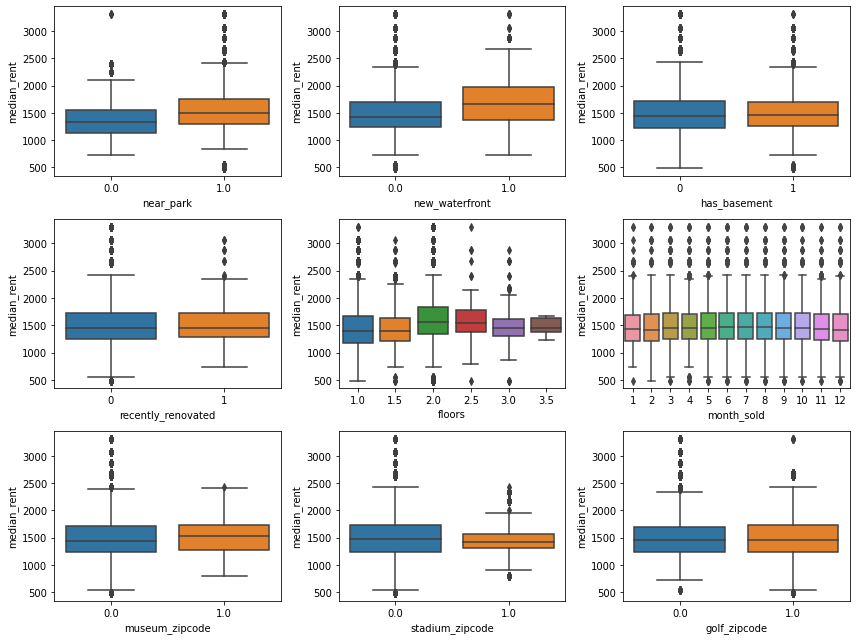

In [83]:
boxplot_cols(df1[categoricals], df1.median_rent)

##### Unfiltered Ordinals: Price Target

There are clear linear relationship for most of the ordinal variables. There is a positive corelation for all of the oridnals beside the health disparity index, which has a clear inverse correlation. Filtering the outliers of these data should help make the relationship more obvious. This is especially true for bedrooms, condition, and school district rankings.  

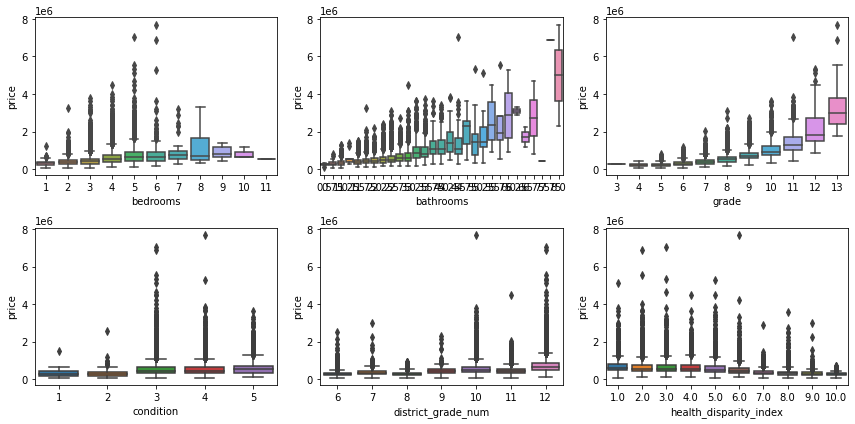

In [84]:
boxplot_cols(df1[ordinals], df1.price)

##### Unfiltered Ordinals: Rent Target

Again,, there are a few outliers that may be affecting the relationships. It is obvious still that there are some linear relations with rent for some of the ordinals. The health disparity index has a seemingly strong negative correlation with rent, while the grade of the property has a strong positive correlation with rent. The School district rankings also has a more obvious relationship with unfiltered rent as compared to unfiltered price. This is due to the much larger proportion of outliers in price as compared to rent. 

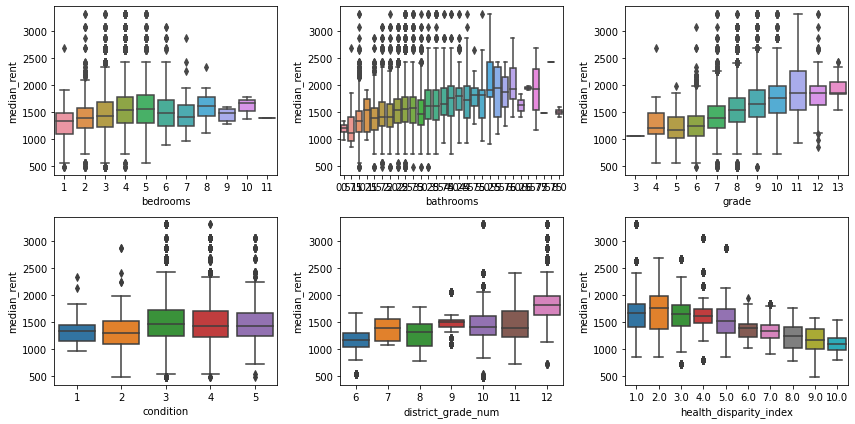

In [85]:
boxplot_cols(df1[ordinals], df1.median_rent)

##### Unfiltered Continuous: Price Target

Strong linear relationships are easily recognizable in the scatterplots of price against most of the features. The large right tail of the lot area feature has severely hindered its relationship with price. The age of the house also does not have a very clear relationship. All other features show great potential for a linear regression model. 

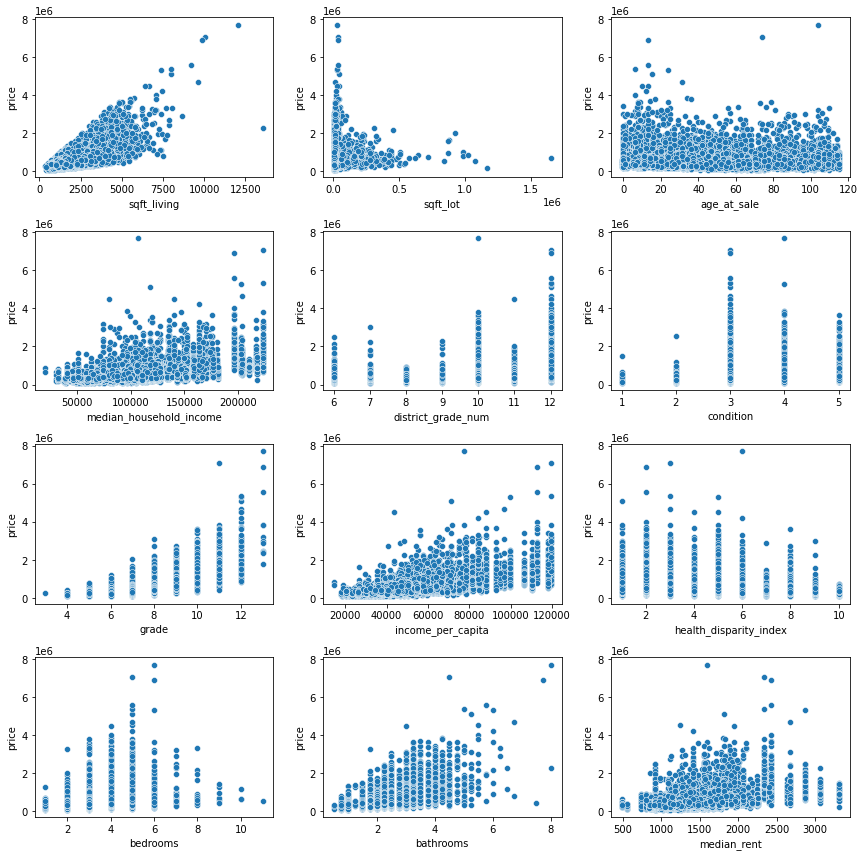

In [86]:
scatterplot_cols(df1[continuous], df1.price)

##### Unfiltered Continuous: Rent Target

Linear relationships between the dependent variables and rent are less obvious as they were with price. However, the relationship between the two income features and rent seem to be fairly linear. This may be due to the nature of how each of these features were collected. Still, it would make logical sense to have a positive correlation between income and rent pricing. Some other clear relationships exist, noteably between school ranks and rent as well as the health disparity index and rent.  

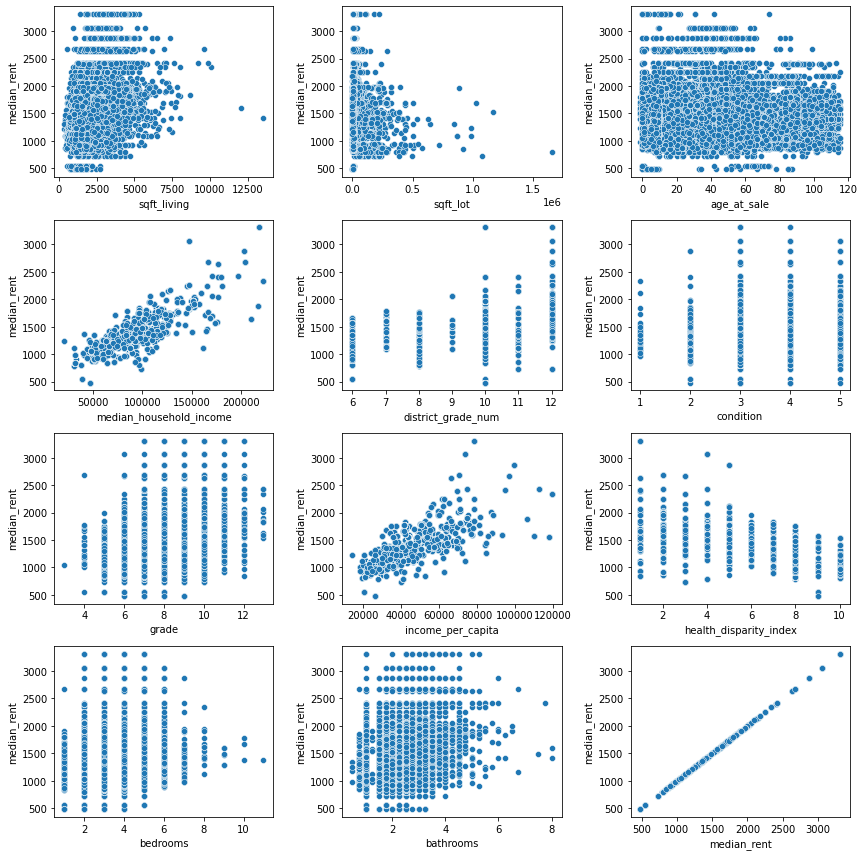

In [87]:
scatterplot_cols(df1[continuous], df1.median_rent)

In [88]:
#drop month sold
#I do not want to include this
#in my model iterations
df1 = df1.drop(columns=['month_sold'])

In [89]:
df1.to_csv('data/unfiltered_processed_data.csv', index=False)

## Filter Data

After creating a baseline model with no filtering, I decided to see how filtering the clean data before the train test split would affect the performance of the model. 

The problem being solved through the creation of this model is to serve new families or individuals moving to King County, Washington understand what factors affect the price of buying a home and by how much. I believe it is reasonable to filter the data to more realistic expectations for first time home buyers. 

Removing data is not always wise for regression models. The result will still be a fair model as long as it is clear that the data is filtered and it is clear what percent of original data has been removed has been removed.

Below I begain iteratively filtering the data based on three key metrics: The price, squarefoot living, and income per capita. For each metric, I determined the interal quartile region and removed outliers approrpriately. 

The iterative IQR filtering of these three metrics resulted in a loss of data of around 8.5%. The model will still retain reasonable predicitive abilities for over 90% of the data.

After the iterative IQR, I decided to filter for only listings that have less than 8 bedrooms and less than 7 bathrooms in order to make the model easier to interpret. This cutoff also reflects more reasonable houses for the target audience to purchase. 

The total amount of data lost to filtering was 8.60%. 

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an ex

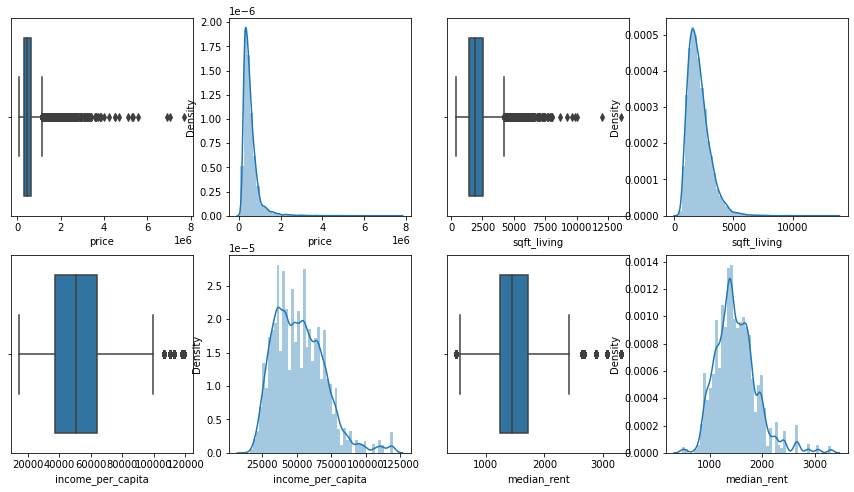

In [90]:
#visualize distrubtions

plt.figure(figsize=(15,8))

plt.subplot(2,4,1)
sns.boxplot(df1['price'])

plt.subplot(2,4,2)
sns.distplot(df1['price'])

plt.subplot(2,4,3)
sns.boxplot(df1['sqft_living'])

plt.subplot(2,4,4)
sns.distplot(df1['sqft_living'])
             
plt.subplot(2,4,5)
sns.boxplot(df1['income_per_capita'])
             
plt.subplot(2,4,6)
sns.distplot(df1['income_per_capita'])

plt.subplot(2,4,7)
sns.boxplot(df1['median_rent'])
             
plt.subplot(2,4,8)
sns.distplot(df1['median_rent'])
             
plt.show();

In [91]:
#filter data using IQR ranges


price_Q1 = df1['price'].quantile(0.25)
price_Q3 = df1['price'].quantile(0.75)
price_iqr = price_Q3 - price_Q1

living_Q1 = df1['sqft_living'].quantile(0.25)
living_Q3 = df1['sqft_living'].quantile(0.75)
living_iqr = living_Q3 - living_Q1

income_Q1 = df1['income_per_capita'].quantile(0.25)
income_Q3 = df1['income_per_capita'].quantile(0.75)
income_iqr = income_Q3 - income_Q1

rent_Q1 = df1['median_rent'].quantile(0.25)
rent_Q3 = df1['median_rent'].quantile(0.75)
rent_iqr = rent_Q3 -rent_Q1

price_upper_limit = price_Q3 + (1.5 * price_iqr)
price_lower_limit = price_Q1 - (1.5 * price_iqr)

living_upper_limit = living_Q3 + (1.5 * living_iqr)
living_lower_limit = living_Q1 - (1.5 * living_iqr)

income_upper_limit = income_Q3 + (1.5 * income_iqr)
income_lower_limit = income_Q1 - (1.5 * income_iqr)

rent_upper_limit = rent_Q3 + (1.5 * rent_iqr)
rent_lower_limit = rent_Q1 - (1.5 * rent_iqr)

In [92]:
print(f'price upper limit: {price_upper_limit}')
print(f'price lower limit: {price_lower_limit}')
print('-----------------------------------')
print(f'living upper limit: {living_upper_limit}')
print(f'living lower limit: {living_lower_limit}')
print('-----------------------------------')
print(f'income upper limit: {income_upper_limit}')
print(f'income lower limit: {income_lower_limit}')
print('-----------------------------------')
print(f'rent upper limit: {rent_upper_limit}')
print(f'rent lower limit: {rent_lower_limit}')

price upper limit: 1129500.0
price lower limit: -162500.0
-----------------------------------
living upper limit: 4230.0
living lower limit: -250.0
-----------------------------------
income upper limit: 103345.5
income lower limit: -2170.5
-----------------------------------
rent upper limit: 2425.5
rent lower limit: 533.5


In [93]:
new_df = df1[(df1['price'] < price_upper_limit) &
             (df1['sqft_living'] < living_upper_limit) &
             (df1['income_per_capita'] < income_upper_limit) &
             (df1['median_rent'] < rent_upper_limit) &
             (df1['median_rent'] > rent_lower_limit)]
             
new_df.shape

(19730, 21)

In [94]:
((len(new_df) - len(df1))/len(df1))*100

-8.644719173959347

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an ex

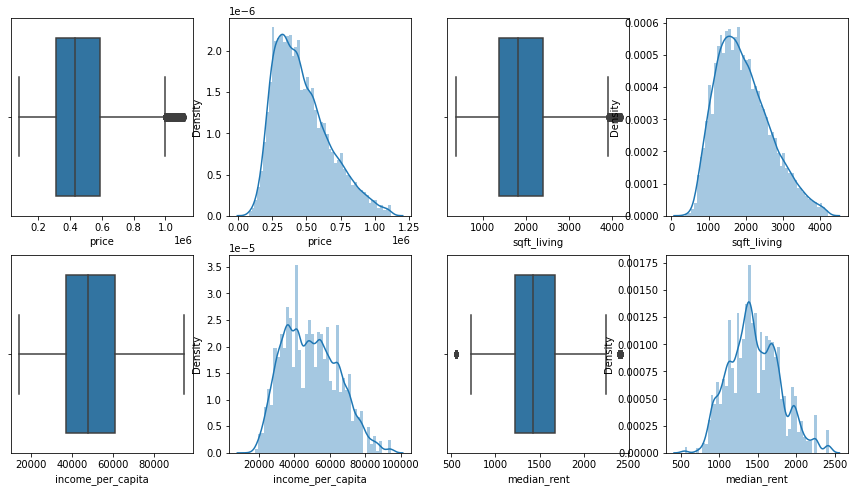

In [95]:
plt.figure(figsize=(15,8))

plt.subplot(2,4,1)
sns.boxplot(new_df['price'])

plt.subplot(2,4,2)
sns.distplot(new_df['price'])

plt.subplot(2,4,3)
sns.boxplot(new_df['sqft_living'])

plt.subplot(2,4,4)
sns.distplot(new_df['sqft_living'])
             
plt.subplot(2,4,5)
sns.boxplot(new_df['income_per_capita'])
             
plt.subplot(2,4,6)
sns.distplot(new_df['income_per_capita'])

plt.subplot(2,4,7)
sns.boxplot(new_df['median_rent'])
             
plt.subplot(2,4,8)
sns.distplot(new_df['median_rent'])
             
plt.show();

In [96]:
new_df['multi_story'] = new_df['floors']

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
#convert all floors of value 1.5 to value 2

one_floor_index = new_df[new_df.floors <= 1].index
multi_story_index = new_df[new_df.floors > 1].index
new_df.loc[one_floor_index, 'multi_story'] = 0
new_df.loc[multi_story_index, 'multi_story'] = 1
new_df.multi_story.value_counts()

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


0.0    10223
1.0     9507
Name: multi_story, dtype: int64

In [98]:
new_df.bedrooms.value_counts(dropna=False)

3     9371
4     5988
2     2704
5     1229
6      209
1      189
7       25
8        8
9        4
10       2
11       1
Name: bedrooms, dtype: int64

In [99]:
new_df.bathrooms.value_counts(dropna=False)

2.50    4985
1.00    3818
1.75    2966
2.25    1881
2.00    1873
1.50    1407
2.75    1049
3.00     629
3.50     485
3.25     369
0.75      70
3.75      70
4.00      55
4.50      34
4.25      15
1.25       7
5.00       6
0.50       4
4.75       3
5.25       2
7.50       1
5.75       1
Name: bathrooms, dtype: int64

In [100]:
#Choose cutoff values for home buying and
#round bathroom to nearest int
#for easier understanding of model

new_df = new_df[(new_df.bedrooms < 8) & (new_df.bathrooms < 6)].copy()

new_df.bathrooms = new_df.bathrooms.round(0).astype(int)
new_df.bathrooms.value_counts()

2    13110
1     3895
3     2039
4      656
5       10
0        4
6        1
Name: bathrooms, dtype: int64

In [101]:
((len(new_df) - len(df1)) / len(df1))*100

-8.714173264805297

#### Distributions of Filltered Data

The normality of the distrubtion for a large bulk of the data has dramatically improved upon IQR outlier removal of some key features. Price and interior living area still have right skew, but they are much closer to being normally distributed as compared to the unfiltered data. The feature for describing the area of the lot is still dramatically right skewed with a large right tail. all of the income features look normally distrubited, for the most part. Grade also seems to be normally distrubted, but with long tails on both ends.  Rent has a bit of a skew but still looks fairly normal. 

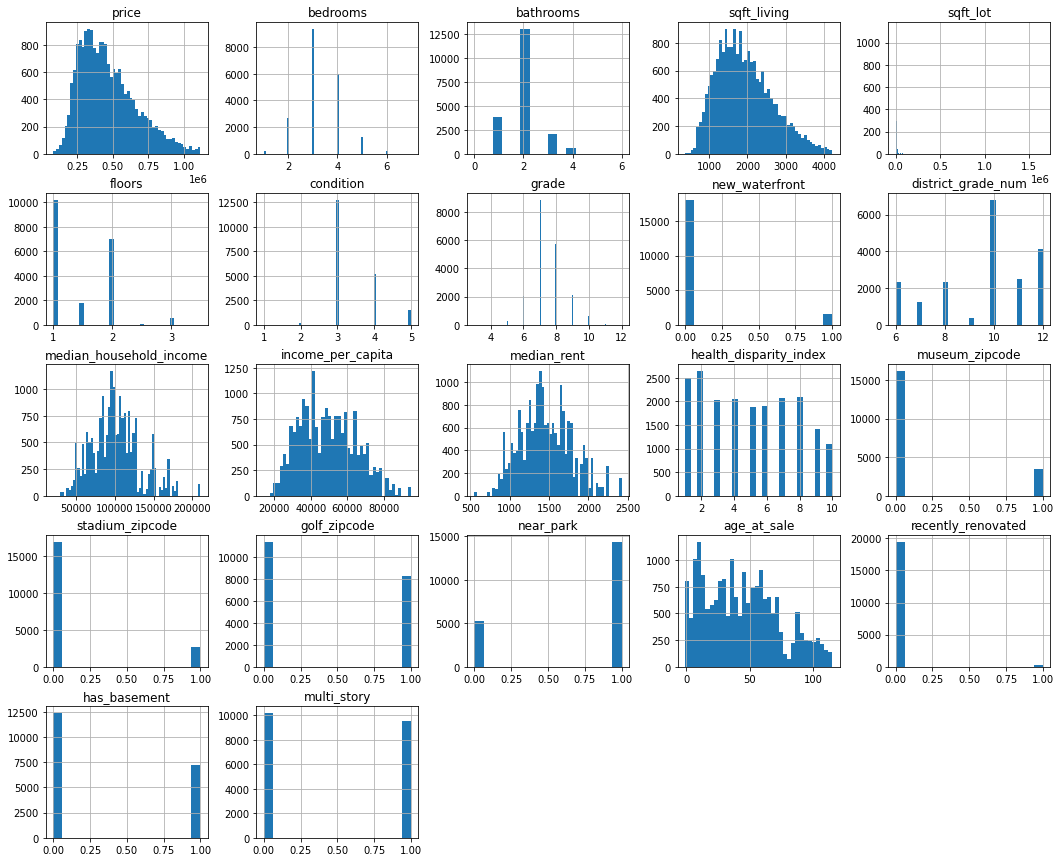

In [102]:
# create histogram for each column
new_df.hist(figsize = (18, 15), bins = 'auto');

In [103]:
categoricals = ['near_park', 'new_waterfront',
               'has_basement', 'recently_renovated',
               'floors', 'museum_zipcode',
               'stadium_zipcode', 'golf_zipcode',
               'multi_story'] 

#### Filtered Categorical Data: Price Target

A much more clear relationship between categorical data and price. There seems to be a clear positive corelation for all features besides stadium zipcodes and golf zipcodes. 

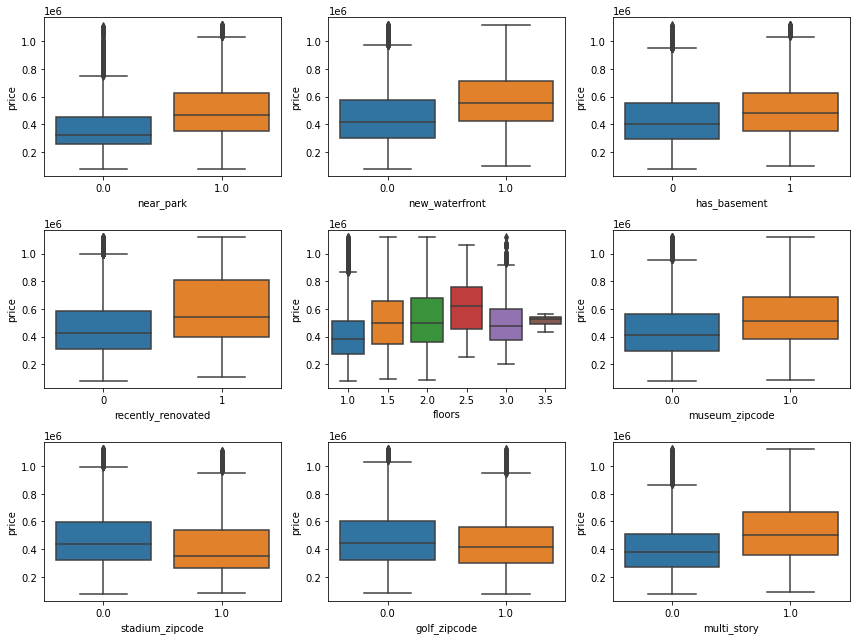

In [104]:
boxplot_cols(new_df[categoricals], new_df.price)

#### Filtered Categorical Data: Rent Target

There appear to be less outliers, but the correlation between rent and the filtered housing data is less obvious as it was for price. However, there still seems to be strong relationships between rent and waterfront as well as being near a park and rent prices.  

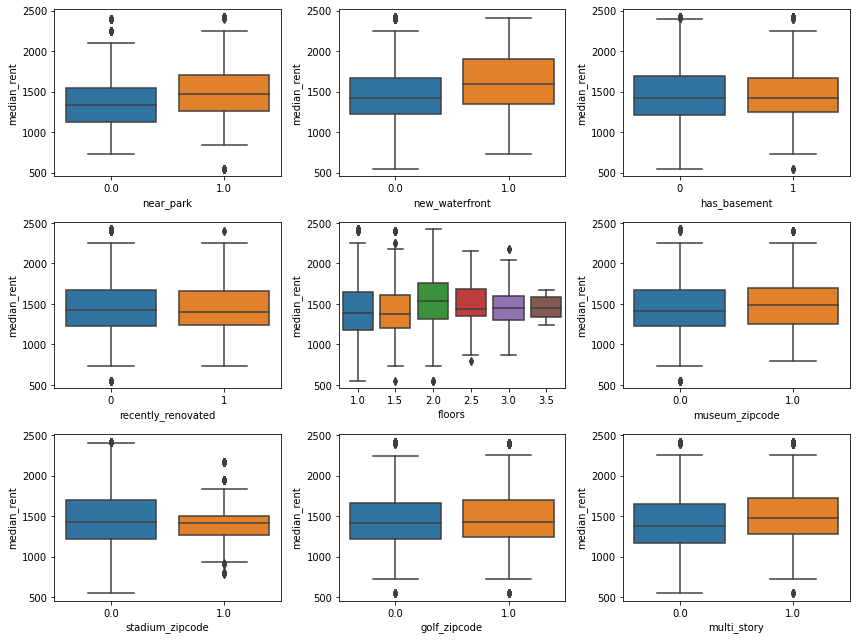

In [105]:
boxplot_cols(new_df[categoricals], new_df.median_rent)

#### Filtered Ordinal Data: Rent Target

With the outliers removed, the relationship between price and the filtered data is way more obvious as it was for unfiltered data. The health disparity index and school district features now have clear correlations with price. 

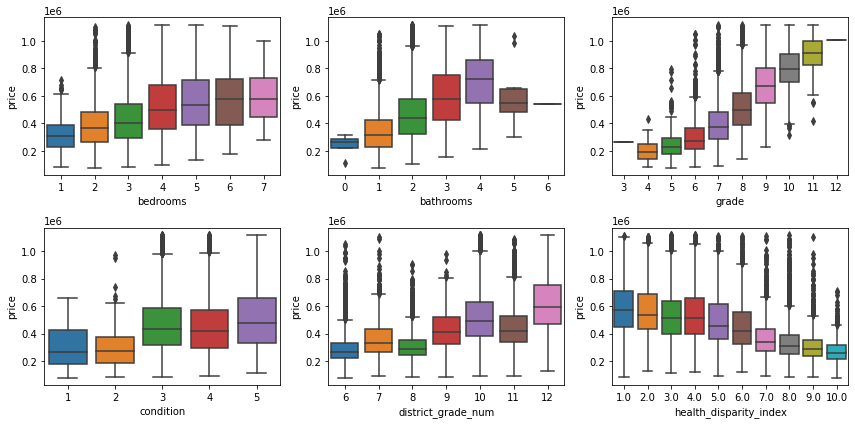

In [106]:
boxplot_cols(new_df[ordinals], new_df.price)

#### Filtered Ordinal Data: Rent Target

There are less dramatic correlations for the ordinal features and rent. Still, grade, district ranks, and the health disparity index seem to be good candidates for linear regression. 

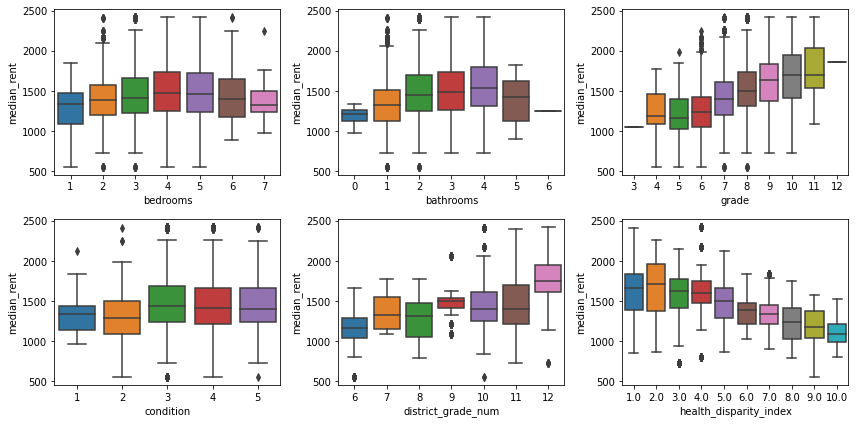

In [107]:
boxplot_cols(new_df[ordinals], new_df.median_rent)

#### Filtered Continuous Data: Price Target

Not much improvement for lot area or age. Every other continuous feature seem to be great picks for a linear regression model.

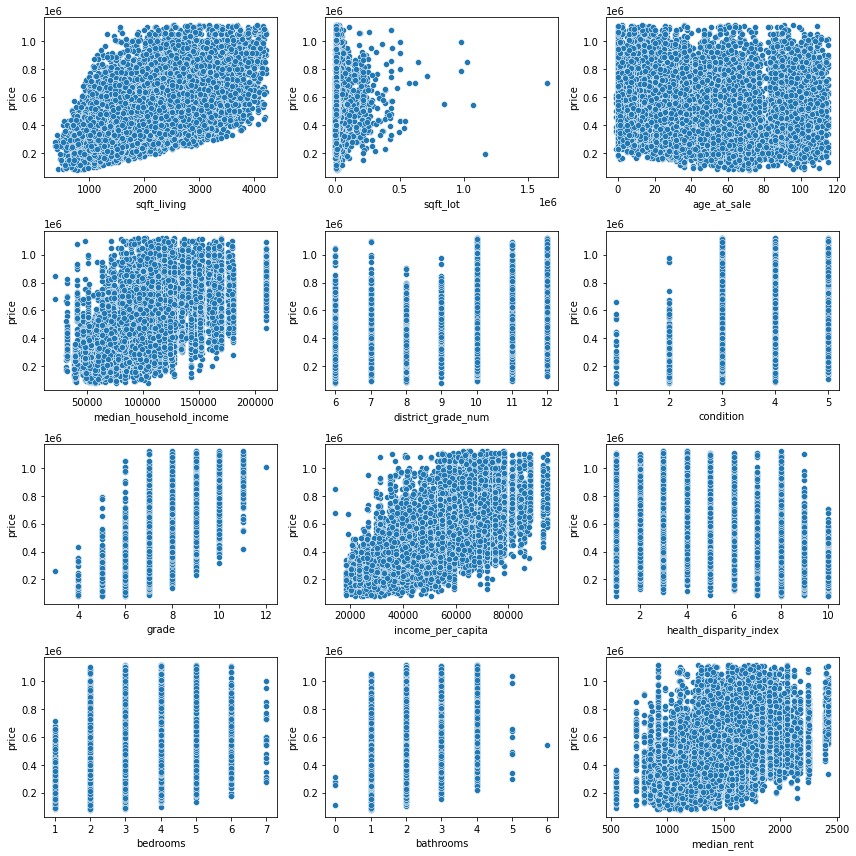

In [108]:
scatterplot_cols(new_df[continuous], new_df.price)

#### Filtered Continuous Data: Rent Target


The health disparity index and the income features make great candidates for a linear regression model with rent. School district ranks also appears to be a great choice, as well as the grades of the construction materials. 

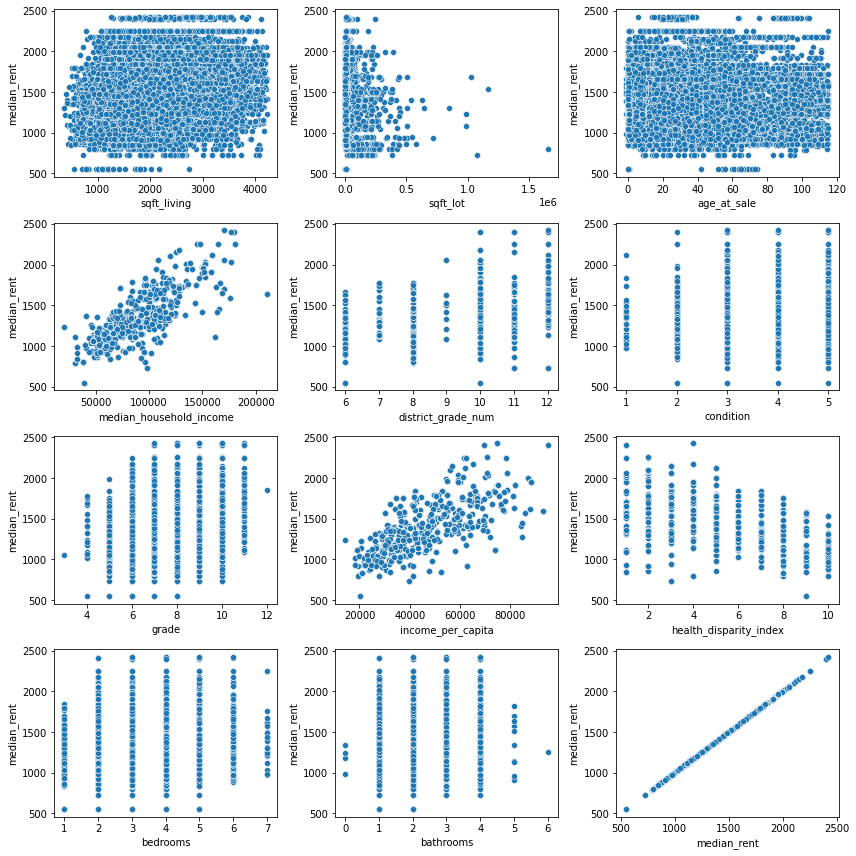

In [109]:
scatterplot_cols(new_df[continuous], new_df.median_rent)

In [110]:
new_df.drop('floors', axis =1, inplace=True)

In [111]:
new_df.to_csv('data/filtered_processed_data.csv', index=False)

#### Assumption of Linear Regression Model:

Before proceeding to my model iterations, please keep the following assumtions in mind that must hold true for multiple linear regression.

- **Linearity:** The relationship between dependent and independent variables should be linear.
- **Homoscedasticity:** Constant variance of the errors should be maintained.
- **Multivariate normality**: Multiple Regression assumes that the residuals are normally distributed.
- **Lack of Multicollinearity**: It is assumed that there is little or no multicollinearity in the data.

### Obtainment Notebook Conclusion

This concludes the data collection, inspection, and processing steps involved for my model creation. Proceed to the Modeling notebook to see what this data was used to create. Please feel free to contact me with any suggestions or any questions. Thank you!

Dylan Dey:
ddey2985@gmail.com